# Simulating Brownian Motion of a Microparticle in Water 
#### Author: Jaime Sabal
#### Date: 20/07/20

### Introduction:

A microparticle suspended in water is subject to a fluctuating force caused by collisions with the surrounding molecules in the fluid, which, in turn, causes it to present Brownian motion dependent on the temperature and the viscosity of the fluid. When evaluating the equation of motion of a particle in a fluid such as water, it is necessary to take this randomness into account. The Langevin equation expressed below precisely does so for a particle of mass m[1]:

$$ m\frac{d^{2}}{dt^{2}}r(t) = -\gamma\frac{d}{dt}r(t) + \chi(t) \tag{1} $$

where $r(t)$ is the position of the particle at time $t$, $\gamma$ is the particle friction coefficient given by Stoke's theorem for a spherical particle of radius $a$ in a fluid with viscosity $\eta$:

$$ \gamma = 6\pi\eta a \tag{2}$$ 

and $\chi(t) = \sqrt{2k_{B}T\gamma} W(t)$ is the fluctuating force due to random impulses from the neighbouring fluid molecules; $W(t)$ is the white noise, $k_{B}$ is Boltzmann's constant and $T$ is the absolute temperature. 

A microparticle in water is usually considered to be in a low Reynolds number regime due to large viscous forces compared to inertial forces. Hence, the first term in Eq. 1 can be ignored and we are left with the final equation of motion:

$$ \frac{d}{dt}r(t) = \sqrt{2D} W(t) \tag{3} $$

where $D = \frac{k_{B}T}{\gamma}$. 

The solution to the above differential equation is called a random walk, and can be acquired through a finite difference equation. The procedure behind this approach is taken from Euler's method (first-order integration). In terms of the finite differences, we arrive to the solution of Eq. 3 iteratively through [2]: 

$$ \frac{x_{i}-x_{i-1}}{\Delta t} = \sqrt{\frac{2D}{\Delta t}} w_{i} \tag{4}$$

from which we get the following by rearranging:

$$ x_{i} = x_{i-1}+ \sqrt{2D \Delta t} w_{i} \tag{5}$$

where $\Delta t$ is the time step taken between consecutive iterations and $w_{i}$ is a discrete number that follows a gaussian distribution with zero mean and unitary variance. This equation is a good approximation for Brownian diffusive motion, which is what a microparticle in a fluid would undergo, since each collision alters the particles velocity and drifts it in a random direction. It is worth noting that this equation is only a good approximation for long time steps $\Delta t >> \tau_{trans}$, where $\tau_{trans}=\frac{m}{\gamma}$ is the time scale of the transition between smooth ballistic behaviour to diffusive behaviour. However, in the case of a microparticle of mass $m\sim 1\mu kg$, this time scale is calculated to be $\tau_{trans}=5.9*10^{-7}s$, and thus since $\Delta t$ is most usually $\leq 0.1$ this approximation applies.

In order to acquire the solution, we must generate a sequence of $w_{i}$ of uncorrelated Gaussian random numbers that have the same properties as $W(t)$ (i.e have zero mean and unitary variance), and then rescale $w_{i}$ to obtain the sequence $W_{i}=\frac{w_{i}}{\sqrt{\Delta t}}$ that has variance $\frac{1}{\sqrt{\Delta t}}$ [2]. To do this, we will use the `numpy` library and its `random.normal` function when defining our function to generate brownian motion in both one and two dimensions.

### Import Necessary Libraries

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit

### Defining Necessary Constants:

In [2]:
kb = 1.38064852e-23 #Boltzmann constant (m^2*kg*s^(-2)*K^(-1))
T = 298 #absolute temperature (Kelvin, eq. to 25 deg Celsius)
m = 1e-14 #mass of microparticle (kg)
a = 1e-06 #microparticle radius (meters)
eta = 8.9e-04 #fluid viscosity (Pa*s)
gamma = 6*np.pi*eta*a #particle friction coefficient (Pa*s*m)

tau_trans = m/gamma #time scale of transition between ballistic and diffusive behaviour (sec)
D = (kb*T)/gamma #constant used in brownian motion calculation

### Defining Function for Brownian Motion in 1D:

In [3]:
def brownian_motion1D(t_initial,t_final,dt,initial_condition=0):
    """Simulates brownian motion in one dimension.
    Parameters:
    t_initial (float/int): time at which particle movement begins.
    t_final (float/int): time at which particle movement ends.
    dt (float): time step used in calculation of motion.
    initial_condition (int/float): position of the particle at time t=0.
    
    Output: 
    brownian_array (1D NumPy array): array of values for the Brownian motion of a microparticle.
    rand_norm_array (1D NumPy array): array of random values that follow a Gaussian
                                     distribution.
    """
    #number of discrete time steps
    N = int((t_final-t_initial)/dt)
    
    #array of random normally distributed numbers with variance 1/dt (st.dev= 1/sqrt(dt))
    #multiplied by an additional factor to get in units of micrometers.
    rand_norm_array = np.sqrt(2*D/dt)*np.random.normal(0,1,N)*1e06
    
    brownian_array = [initial_condition] #initialise array for brownian motion with initial condition x(t=0)=0
    
    #loop over all random values
    for i in range(N-1):
        brownian_array.append(brownian_array[i] + dt*rand_norm_array[i])
        
    return brownian_array, rand_norm_array

### Plotting Brownian Motion of Microparticle in 1D and Random Increments for Different Step Sizes

<IPython.core.display.Javascript object>


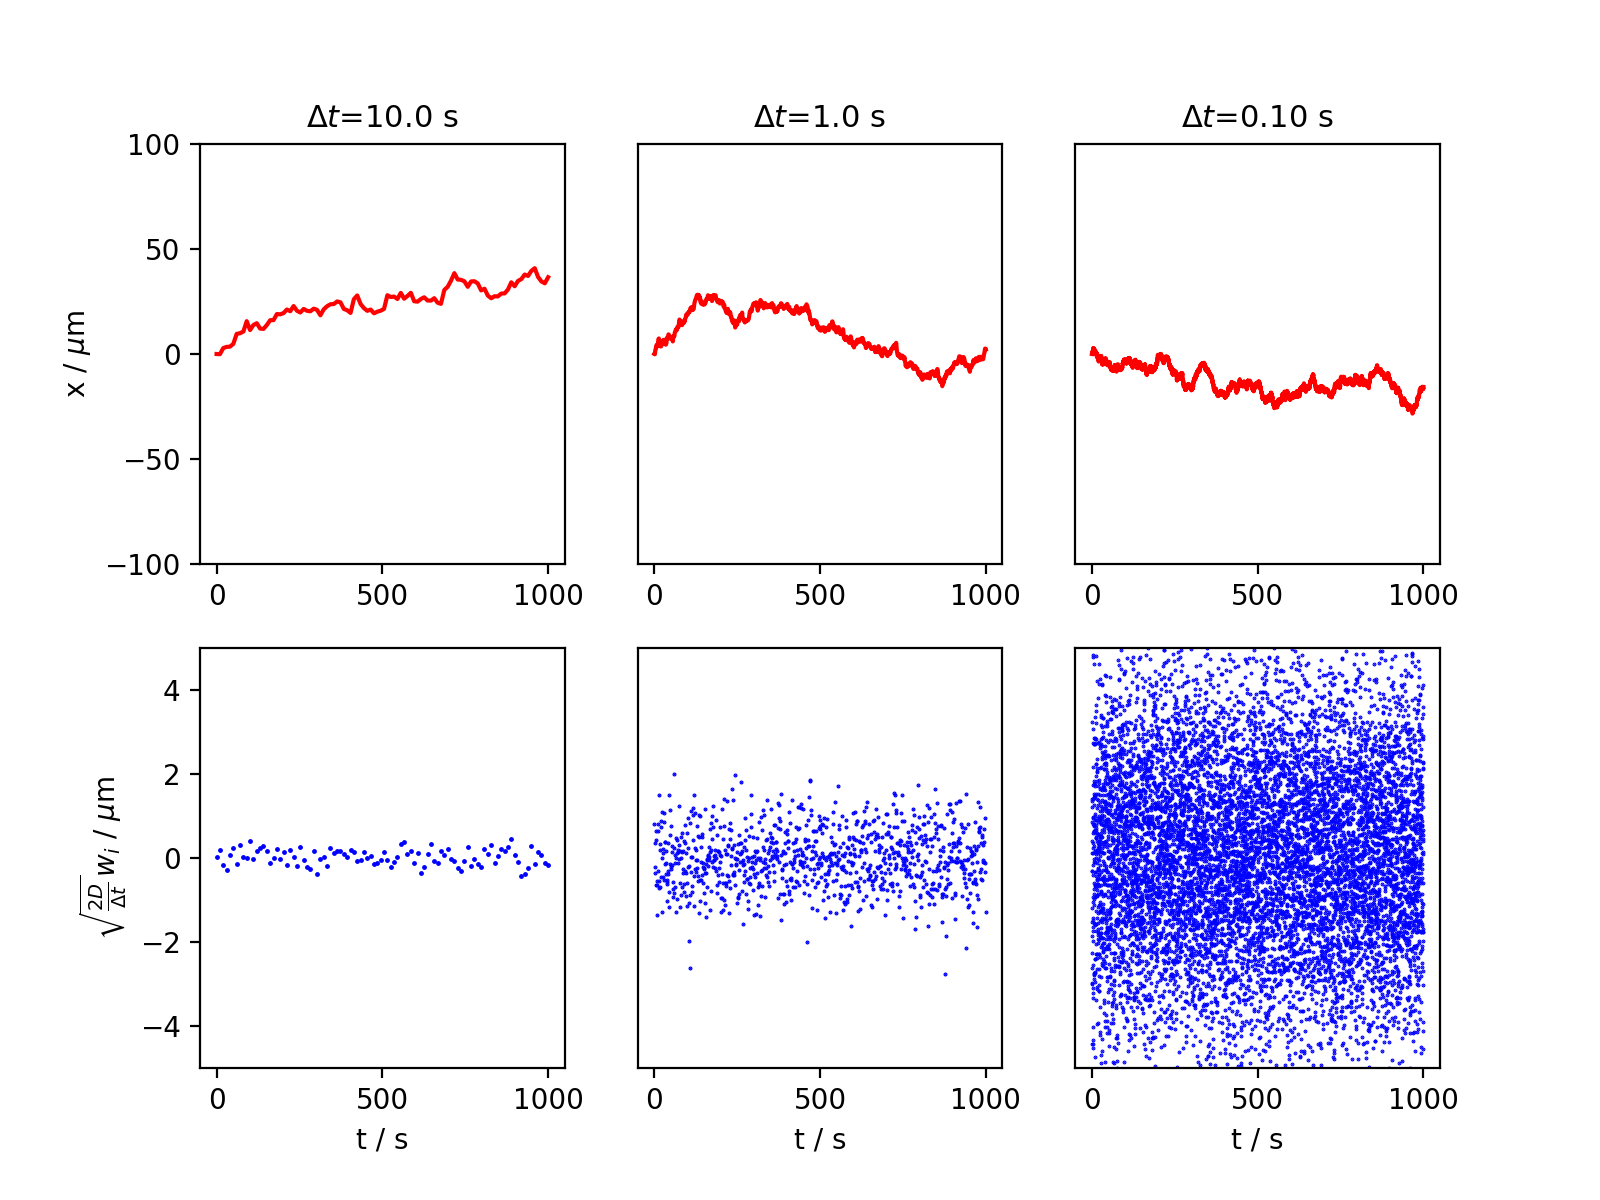

In [4]:
#discrete time steps
dt_array = [10.0,1.0,0.1]

t_initial = 0 #initial time
t_final = 1000 #time at which movement ends

#array of time arrays for different N
t = [np.linspace(t_initial,t_final,int((t_final-t_initial)/dt)) for dt in dt_array] 

#array of arrays describing motion of microparticle with different time steps
#multiply by 1e06 to have in units of µm
x_arrays = [np.asarray(brownian_motion1D(t_initial,t_final,dt)[0]) for dt in dt_array] 

#arrays of random increments in particle position for different time steps
#multiply by 1e06 to have in units of µm
w_arrays = [np.asarray(brownian_motion1D(t_initial,t_final,dt)[1]) for dt in dt_array]

#add figure to plot on
fig = plt.figure(figsize=(8,6))

#1D brownian motion subplot, N=50
ax1 = fig.add_subplot(231) 
ax1.plot(t[0],x_arrays[0], "r")
ax1.set_ylim(-100,100)
ax1.set_title("$\Delta t$=%0.1f s"%(dt_array[0]), fontsize=11)
ax1.set_ylabel("x / $\mu$m")

#1D brownian motion subplot, N=250
ax2 = fig.add_subplot(232) 
ax2.plot(t[1],x_arrays[1], "r")
ax2.set_yticks([])
ax2.set_ylim(-100,100)
ax2.set_title("$\Delta t$=%0.1f s"%(dt_array[1]), fontsize=11)

#1D brownian motion subplot, N=1250
ax3 = fig.add_subplot(233) 
ax3.plot(t[2],x_arrays[2], "r")
ax3.set_yticks([])
ax3.set_ylim(-100,100)

ax3.set_title("$\Delta t$=%0.2f s"%(dt_array[2]), fontsize=11)

ax4 = fig.add_subplot(234) #1D random increments of particle subplot, N=100
ax4.plot(t[0],w_arrays[0], "b.", markersize=1.5)
ax4.set_ylim(-5,5)
ax4.set_xlabel("t / s")
ax4.set_ylabel(r"$\sqrt{\frac{2D}{\Delta t}}w_{i}$ / $\mu$m")


ax5 = fig.add_subplot(235) #1D random increments of particle subplot, N=1000
ax5.plot(t[1],w_arrays[1], "b.", markersize=0.9)
ax5.set_ylim(-5,5)
ax5.set_yticks([])
ax5.set_xlabel("t / s")


ax6 = fig.add_subplot(236) #1D random increments of particle subplot, N=10000
ax6.plot(t[2],w_arrays[2], "b.", markersize=0.8)
ax6.set_ylim(-5,5)
ax6.set_yticks([])
ax6.set_xlabel("t / s");
#plt.savefig("Brownian1D.png")

As can be seen in the top three plots above the brownian motion, x(t), of the microparticle in water is shown. The bottom three plots show $\sqrt{\frac{2D}{\Delta t}}w_{i}$, where it can be seen how the random increments increase in magnitude as $\Delta t$ decreases. This is due to the fact that the variance of these random increments is dependent on the step size by $\frac{1}{\Delta t}$, and thus diverges as $\Delta t \longrightarrow 0$.

### Mean Square Displacement in 1D:

Now that we have plotted the Brownian motion of the microparticle in 1D, it is also interesting to look at the mean square displacement (MSD) of the particle. The MSD quantifies how much a particle moves away from its initial position. It is calculated by the equation [1]:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = \langle (x(t+\tau)-x(t))^{2} \rangle \tag{6}$$

where $x(t+\tau)-x(t)$ is the displacement of the particle in a time interval (delay) $\tau$. This delay corresponds to an index shift $n=\frac{\tau}{\Delta t}$ in our data array.

In the cell below we define a function that returns the mean square displacement for a particle undergoing Brownian motion. We then plot the MSD as a function of $\tau$. According to [1], the MSD for a particle's trajectory in one spatial dimension should be linear with $\tau$:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = 2D\tau \tag{7} $$

where $D$ is the diffusion coefficient. In terms of calculating the error in the MSD, H. Qian et al (1991) [3] provides a good analysis that we can use to determine the maximum stochastic error for each delay. The worst-case stochastic error for the MSD of a position array with $N$ data points, calculated through a shift $n$ in our array due to a delay $\tau$, is:

$$ \Delta < 2Dn\Delta t \left[ \frac{2n^2+1}{3n(N-n+1)} \right]^{1/2} \tag{8}$$



In [5]:
def MSD_1D(x_array, tau, dt):
    """Gives the mean square displacement for a particle undergoing Brownian motion for motion in any 
    number of spatial dimensions.
    Parameters:
    motion_array (n-D_NumPy array): n-dimensional array of particle positions in form [[x1,x2,..],[y1,y2,..],..].
    tau (float): time delay taken in calculation of MSD. tau <= (T_final-T_initial).
    dt (float): time step taken between particle movements.
    
    Output:
    MSD (float): mean square displacement (µm^2).
    error (float): error in the experimental MSD (µm^2).
    """
    
    #shift in data accounting for delay
    shift = int(np.floor(tau/dt))
    
    #create an array shifted by amount corresponding to delay
    shifted_array = np.empty_like(x_array)
    shifted_array[-shift:] = np.nan
    shifted_array[:-shift] = x_array[shift:]
        
    #difference squared
    diff_sq = np.square(x_array-shifted_array)
        
    #mean square dispalcement, calculated and theoretical, in µm^2
    MSD = np.nanmean(diff_sq)
    
    #error in MSD, multiplied by 1e12 to have units µm^2
    error = 2*D*shift*dt*(np.sqrt((2*shift**2+1)/(3*shift*(len(x_array)-shift+1))))*1e12
    
    return MSD,error

<IPython.core.display.Javascript object>


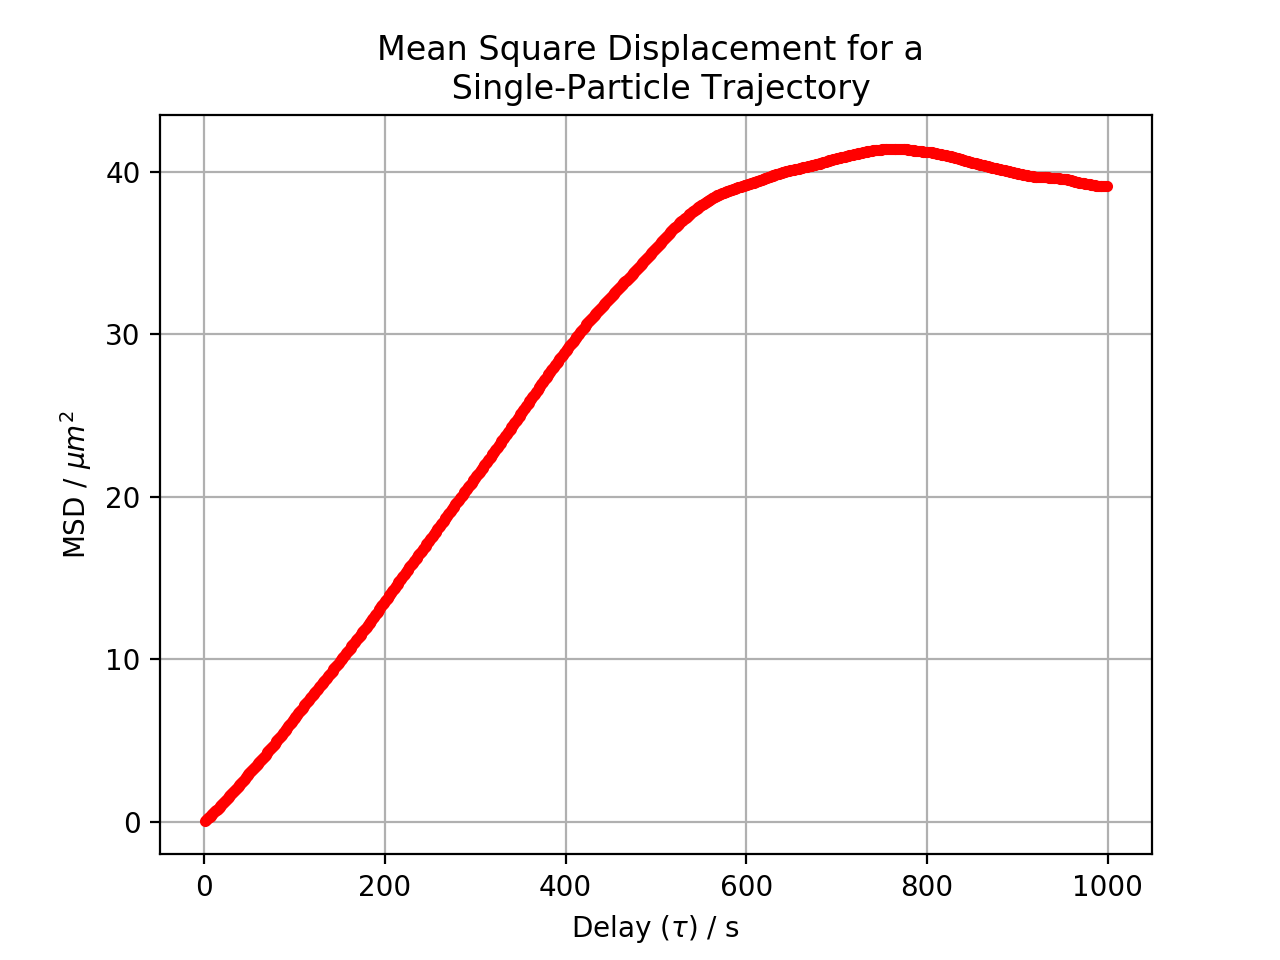

In [6]:
#make tau array for N=1000
dt = dt_array[1]
tau_array = np.arange(dt,t_final-t_initial,dt)

#MSD arrays for different values of T
MSD_exp_array1 = [MSD_1D(x_arrays[2],tau,dt)[0] for tau in tau_array]  

#make new figure and plot MSD against tau
plt.figure()
plt.grid()
plt.title("Mean Square Displacement for a \n Single-Particle Trajectory")
plt.plot(tau_array,MSD_exp_array1, "r.-")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$");
#plt.savefig("MSD_1D.png")

### Discussion:
From the plot above, we observe how the calculated MSD shows an positive trend for small values of delay but this behaviour changes for large values of $\tau$. The reason for this is that as values for the delay become larger, there is less and less data to compute the mean square displacement and thus the error becomes very large. Therefore, the MSD computed here becomes meaningless for single-particle trajectories for large values of $\tau$.

In order to fix this issue to a large extent we can take the average MSD for each value of $\tau$ over more than just one single-particle trajectory. In the cell below we define a function `averaged_MSD` that calculates the MSD for a given number of trajectories and returns a plot against $\tau$.

In [7]:
def averaged_MSD(dt, trajectories, t_initial=0, t_final=1000, dim=1):
    """Returns the averaged MSD for a given number of microparticle trajectories in the form of a 
    plot of MSD vs tau.
    
    Parameters:
    dt = time step between particle movements.
    trajectories (int): number of trajectories to average the MSD over.
    t_initial (float/int): time at which particle movement begins in seconds (default=0).
    t_final (float/int): time at which particle movement ends in seconds (default=1000).
    dim (int): number of spatial dimensions (default = 1, can't be >3).
    
    Output:
    tau_array (1D NumPy array): array of values for the delay (tau). dt <= tau <= t_final-t_initial
    MSD_average (1D NumPy array): array of MSD values for each possible delay (tau).
    ax (matplotlib.axes): plot of MSD against tau for 20% of the data points.
    """
    t_total = t_final-t_initial #duration of particle motion.
    domain = int(t_total/(5*dt)) #set domain of plot to 20% of data points (num_points=t_total/dt).
    
    tau_array = np.arange(dt,t_total,dt) #array of delays to calculate MSD
    
    i = 0 #initialise iterative variable for upcoming loops
    
    #calculate average MSD for one spatial dimension
    if dim == 1:
        x_arrays = []

        #make x_arrays with step size dt to make average of trajectories for MSD
        while i < trajectories:
            x_arrays.append(brownian_motion1D(t_initial,t_final,dt)[0])
            i += 1
    
        #initialise array to append different MSD arrays to
        MSD_arrays = []

        #loop to calculate different MSD arrays for each trajectory
        for array in x_arrays:
            #calculate MSD for different delays (in µm^2)
            MSD_arrays.append([MSD_1D(array,tau,dt)[0] for tau in tau_array])

        #make an average MSD array of all trajectories
        MSD_average = [np.mean(MSD_list) for MSD_list in zip(*MSD_arrays)]
        MSD_error = [MSD_1D(x_arrays[0],tau,dt)[1] for tau in tau_array]
    
    elif dim == 2:
        x_arrays = []
        y_arrays = []

        #make x_arrays with step size dt to make average of trajectories for MSD
        while i < trajectories:
            x_arrays.append(brownian_motion2D(t_initial,t_final,dt)[0])
            y_arrays.append(brownian_motion2D(t_initial,t_final,dt)[1])
            i += 1
    
        #initialise array to append different MSD arrays to
        MSD_arrays = []

        #loop to calculate different MSD arrays for each trajectory
        for x_array, y_array in zip(x_arrays, y_arrays):
            #calculate MSD for different delays (in µm^2)
            MSD_arrays.append([MSD_2D(x_array,y_array,tau,dt)[0] for tau in tau_array])

        #make an average MSD array of all trajectories
        MSD_average = [np.mean(MSD_list) for MSD_list in zip(*MSD_arrays)]
        MSD_error = [MSD_2D(x_arrays[0],y_arrays[0],tau,dt)[1] for tau in tau_array]
        
    elif dim == 3:
        x_arrays = []
        y_arrays = []
        z_arrays = []

        #make 50 x,y, and z arrays with N=1000 to make average of 50 trajectories for MSD
        while i < trajectories:
            x_arrays.append(optical_trap(t_initial,t_final,dt_array[1])[0])
            y_arrays.append(optical_trap(t_initial,t_final,dt_array[1])[1])
            z_arrays.append(optical_trap(t_initial,t_final,dt_array[1])[2])
            i += 1
    
        #initialise array to append different MSD arrays to
        MSD_arrays = []

        #loop to calculate different MSD arrays for each trajectory
        for x_array,y_array,z_array in zip(x_arrays,y_arrays,z_arrays):
            MSD_arrays.append([MSD_trap(x_array,y_array,z_array,tau,dt) for tau in tau_array])

        #make an average MSD array of all trajectories
        MSD_average = [np.mean(MSD_list) for MSD_list in zip(*MSD_arrays)]
        MSD_error = np.nan
   
    #plot linear portion in a figure alongside theoretical curve and linear fit
    fig,ax = plt.subplots()
    ax.grid()
    ax.set_title("Mean Square Displacement ({0}D) over {1} Single-Particle \n Trajectories for Different Delays".format(dim,trajectories))
    if dim == 1 or dim == 2:
        ax.errorbar(tau_array[:domain],MSD_average[:domain],yerr=MSD_error[:domain],ecolor="gray",fmt= "r+", label="Average MSD over %i \n Trajectories"%trajectories)
    elif dim == 3:
        ax.plot(tau_array[:domain],MSD_average[:domain],"r.-",label="Average MSD over %i \n Trajectories"%trajectories)
    ax.set_xlabel(r"Delay ($\tau$) / s")
    ax.set_ylabel("MSD / $\mu m^{2}$")
    ax.legend(loc="best"); 
    
    return tau_array, MSD_average, MSD_error, ax

<IPython.core.display.Javascript object>


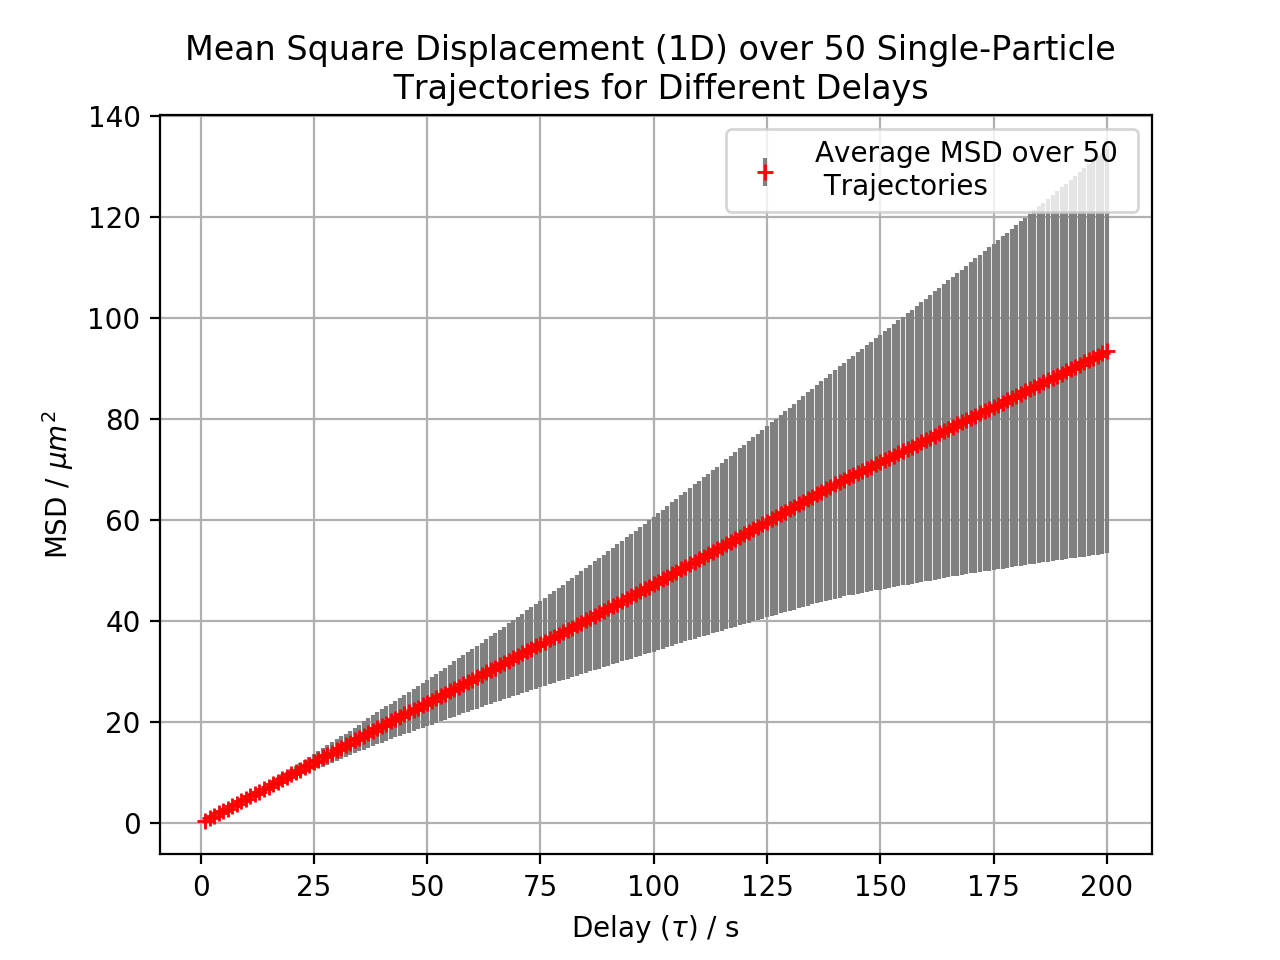

In [8]:
#number of trajectories
trajectories = 50

#use defined function to plot
tau_array1, MSD_average1, MSD_error1, ax1 = averaged_MSD(dt_array[1], trajectories)
plt.show()

As can be seen, the plot above shows a much clearer linear trend than the previous one. Note how even though we used an array with $N=1000$ data points corresponding to $1000s$ of motion, we only plotted the MSD in an interval $\tau \epsilon \left[0,200\right]$ ($20\%$ of the total number of points)  since the error grows very large (see Eq. 7) as $\tau \longrightarrow N$.

Since $\mathsf{M}\mathsf{S}\mathsf{D}(\tau)$ behaves theorectically by Eq. (7), we can use the gradient of the initial (most) linear portion of the plot to calculate the "experimental" diffusion coefficient and compare it with the theoretical value of:

$$ D = \frac{k_{B}T}{\gamma} \tag{9} $$ 

which for the values used for the constants in (8) results in a value for $D$ of:

$$ D = 0.2452 \mu m^{2}s^{-1} $$

Below we use the `numpy.polyfit` function to calculate the polynomial parameters for a linear fit and use the gradient to calculate $D$ through the function:

$$ D = \frac{slope}{2} \tag{10} $$

<IPython.core.display.Javascript object>


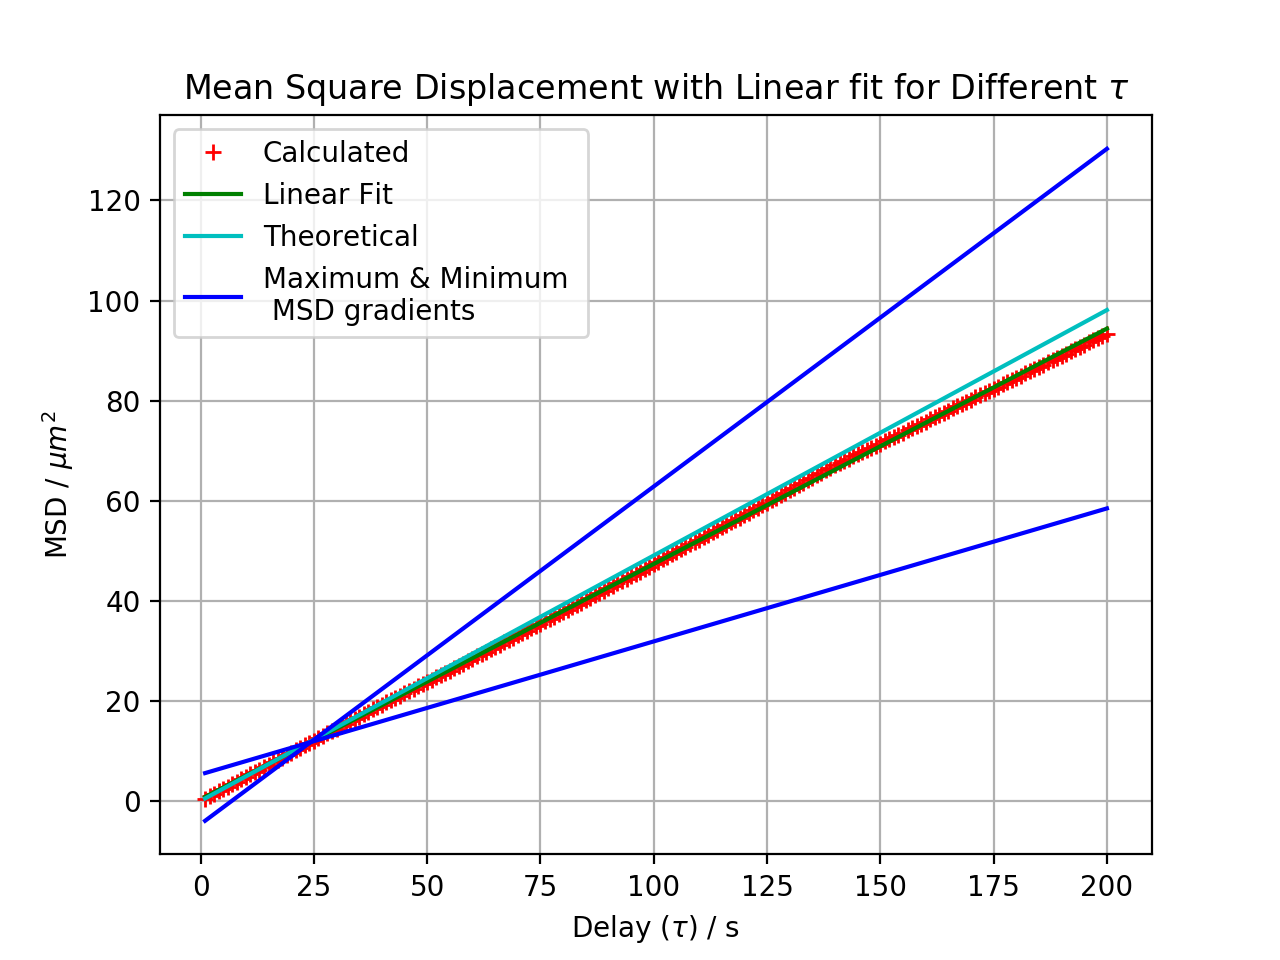

The slope of the MSD average curve:
 0.470 µm^2*s^-1
The slope of the maximum gradient is:
 0.675 µm^2*s^-1
The slope of the minimum gradient is:
 0.266 µm^2*s^-1
The calculated diffusion coefficient is:
 [ 0.23515 ± 0.10226 ] µm^2*s^-1
with percent error:
 43.5 %
The theoretical Diffusion coefficient is:
 0.24525 µm^2*s^-1
Perceived Percent error:
 -4.1 %


In [9]:
#define domain in which to plot theoretical curve
domain = int((t_final-t_initial)/(5*dt_array[1]))

#redefine arrays to fit in domain
tau_array1 = tau_array1[:domain]
MSD_average1 = MSD_average1[:domain]
MSD_error1 = MSD_error1[:domain]

#make theoretical MSD array
MSD_theo1 = [2*D*tau*1e12 for tau in tau_array1] 

#make linear fit
linear_params1 = np.polyfit(tau_array1,MSD_average1,deg=1)
linear_fit1 = linear_params1[0]*tau_array1+linear_params1[1]  

#worst-case scenario max and min MSD arrays
min_MSD1 = np.array(MSD_average1)-np.array(MSD_error1)
max_MSD1 = np.array(MSD_average1)+np.array(MSD_error1)

#make maximum and minimum gradients
max_linear_params1 = np.polyfit(tau_array1,max_MSD1,deg=1)
max_gradient1 = max_linear_params1[0]*tau_array1+max_linear_params1[1]

min_linear_params1 = np.polyfit(tau_array1,min_MSD1,deg=1)
min_gradient1 = min_linear_params1[0]*tau_array1+min_linear_params1[1]

#make new figure and plot MSD against dt
plt.figure()
plt.grid()
plt.title(r"Mean Square Displacement with Linear fit for Different $\tau$")
plt.plot(tau_array1,MSD_average1,"r+", label="Calculated")
plt.plot(tau_array1,linear_fit1,"g", label="Linear Fit")
plt.plot(tau_array1,MSD_theo1, "c", label="Theoretical")
plt.plot(tau_array1,max_gradient1, "b", label="Maximum & Minimum \n MSD gradients")
plt.plot(tau_array1,min_gradient1, "b")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$")
plt.legend(loc="best");
print("The slope of the MSD average curve:\n %0.3f"%linear_params1[0], "µm^2*s^-1")
print("The slope of the maximum gradient is:\n %0.3f"%max_linear_params1[0], "µm^2*s^-1")
print("The slope of the minimum gradient is:\n %0.3f"%min_linear_params1[0], "µm^2*s^-1")
print("The calculated diffusion coefficient is:\n [ {:.5f}".format(linear_params1[0]/2), "± {:.5f}".format((max_linear_params1[0]-min_linear_params1[0])/4), "] µm^2*s^-1")
print("with percent error:\n {:.1f}".format(((max_linear_params1[0]-min_linear_params1[0])*100/2)/linear_params1[0]), "%")
print("The theoretical Diffusion coefficient is:\n {:.5f}".format(D*1e12), "µm^2*s^-1")
print("Perceived Percent error:\n {:.1f}".format((linear_params1[0]/2-D*1e12)*100/(D*1e12)), "%")

### Discussion:

The calculated diffusion coefficient from our data is $D_{exp}=[0.244 \pm 0.101] \mu m^{2}s^{-1}$, while the theoretical one is $D_{theo}=0.24525 \mu m^{2}s^{-1}$. The calculated value thus includes the theoretical one within one $\sigma$. However, the error is quite large at around $41\%$, whereas the calculated coefficient seems to be very accurate with respect to the theoretical value. This is an indicator that we are overestimating the error. Indeed, our method of calculating the error doesn't take into account the fact that as the MSD is averaged over more and more trajectories, its slope converges to a value that would exactly give the theoretical diffusion coefficient. As a means of visualisation of this phenomenon, I have calculated the perceived errors between these two for a different number of averaged trajectories:

10 Trajectories: $ \% \Delta = \frac{0.19297-0.24525}{0.24525}*100 = 21.3\% $

25 Trajectories: $ \% \Delta = \frac{0.28866-0.24525}{0.24525}*100 = 17.7\% $

50 Trajectories: $ \% \Delta = \frac{0.27294-0.24525}{0.24525}*100 = 11.7\% $

100 Trajectories: $ \% \Delta = \frac{0.24403-0.24525}{0.24525}*100 = 0.5\% $

We will now move on to explore the microparticles' Brownian motion in two spatial dimensions and see how it compares to the things investigated so far in 1D.

### Weighted Fit

We will now attempt to calculate a weighted fit for our data taking into account the acquired error for the Mean Square Displacement. For this, we will make use of the `scipy.optimize` library, specifically the function `curve_fit` within it. The first step would be to define a function for the "target" function which would be the theoretical MSD mentioned before (Eq. 6). 



In [10]:
def MSD_theo1D(tau_array, D):
    """Theoretical Mean Square Displacement in one spatial dimension.
    Parameters:
    tau_array (1D NumPy array): array of values for the delay.
    D (float): diffusion coefficient.
    
    Returns: 1D NumPy array of values for theoretical MSD in µm^2*s^(-1)."""
    
    return 2*D*tau_array

<IPython.core.display.Javascript object>


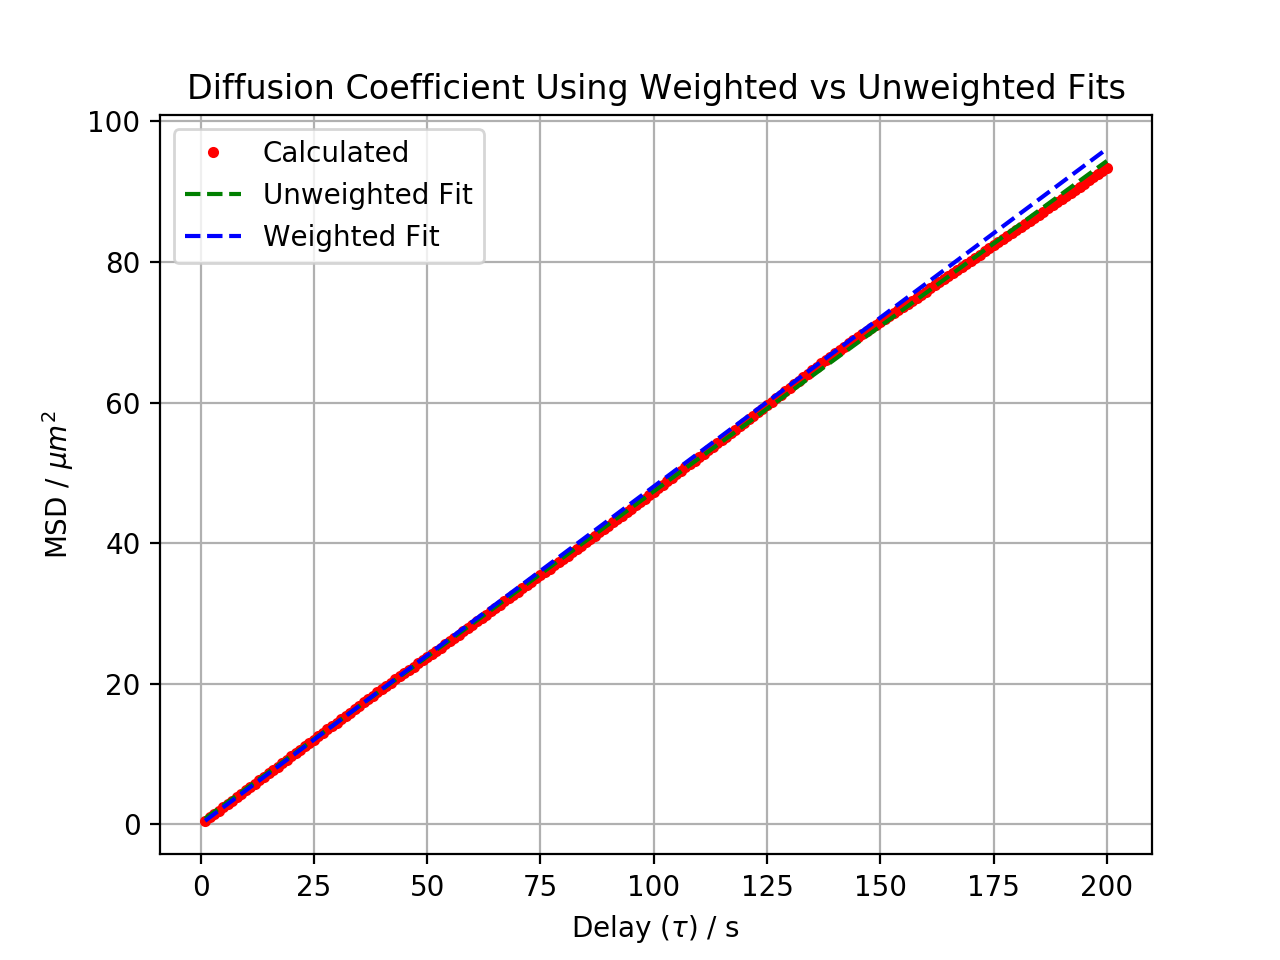

The theoretical Diffusion coefficient is:
 0.24525 µm^2*s^-1
Diffusion coefficient using unweighted fit:
 [ 0.23515 ± 0.10226 ] µm^2*s^-1
Perceived Percent error:
 -4.1 %
Diffusion coefficient using weighted fit:
 0.24029  µm^2*s^-1
Perceived Percent error:
 -2.0 %


In [11]:
#solve for the diffusion coefficient using `curve_fit`
popt, pcov = curve_fit(MSD_theo1D, tau_array1, MSD_average1, sigma=MSD_error1, bounds=(0 , 0.3))

#plot new weighted fit and compare with previous linear fit
plt.figure()
plt.grid()
plt.title("Diffusion Coefficient Using Weighted vs Unweighted Fits")
plt.plot(tau_array1,MSD_average1,"r.", label="Calculated")
plt.plot(tau_array1,linear_fit1,"g--", label="Unweighted Fit")
plt.plot(tau_array1,MSD_theo1D(tau_array1,*popt),"b--", label="Weighted Fit")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$")
plt.legend(loc="best")
print("The theoretical Diffusion coefficient is:\n {:.5f}".format(D*1e12), "µm^2*s^-1")
print("Diffusion coefficient using unweighted fit:\n [ {:.5f}".format(linear_params1[0]/2), "± {:.5f}".format((max_linear_params1[0]-min_linear_params1[0])/4), "] µm^2*s^-1")
print("Perceived Percent error:\n {:.1f}".format((linear_params1[0]/2-D*1e12)*100/(D*1e12)), "%")
print("Diffusion coefficient using weighted fit:\n {:.5f}".format(popt[0]), " µm^2*s^-1")
print("Perceived Percent error:\n {:.1f}".format((popt[0]-D*1e12)*100/(D*1e12)), "%")

### Discussion

As can be seen, fitting our data with a linear curve taking into account the calculated error in the MSD results in a much more accurate value for the diffusion coefficient. This is because the weighted fit takes the values with the least uncertainty (in this case those for low values of $\tau$) and relies more on them to calculate the slope/diffusion coefficient than in the values with a larger uncertainty. 

## Brownian Motion of Microparticle in 2D:

Now that we have explored the motion and MSD of a microparticle suspended in water in one dimension, the next step is to explore its motion in two dimensions, x & y. Below we define the function `brownian_motion2D` that creates both an array for the x and y positions of the microparticle.

In [12]:
def brownian_motion2D(t_initial,t_final,dt, initial_condition=[0,0]):
    """Simulates brownian motion in two dimensions.
    Parameters:
    t_initial (float/int): time at which particle movement begins.
    t_final (float/int): time at which particle movement ends.
    dt (int): time step.
    initial_condition (2D-array): values for initial condition (default=(0,0)).
    
    Output: 
    brownian_xarray (1D NumPy array): array of x values for the Brownian motion of a microparticle.
    brownian_yarray (1D NumPy array): array of x values for the Brownian motion of a microparticle.
    """
    N = int((t_final-t_initial)/dt) #time step
    
    #w_x and w_y, arrays of random normally distributed numbers with variance 1/dt (st.dev= 1/sqrt(dt))
    #multiplied by an additional factor to have in units of micrometers
    rand_norm_xarray = np.sqrt(2*D/dt)*np.random.normal(0,1,N)*1e06
    rand_norm_yarray = np.sqrt(2*D/dt)*np.random.normal(0,1,N)*1e06
    
    #initialise array for brownian motion with initial condition x(t=0)=0 and y(t=0)=0.
    brownian_xarray = [initial_condition[0]] 
    brownian_yarray = [initial_condition[1]]
    
    #loop over all random values
    for i in range(N-1):
        brownian_xarray.append(brownian_xarray[i]+dt*rand_norm_xarray[i])
        brownian_yarray.append(brownian_yarray[i]+dt*rand_norm_yarray[i])
        
    return brownian_xarray,brownian_yarray

<IPython.core.display.Javascript object>


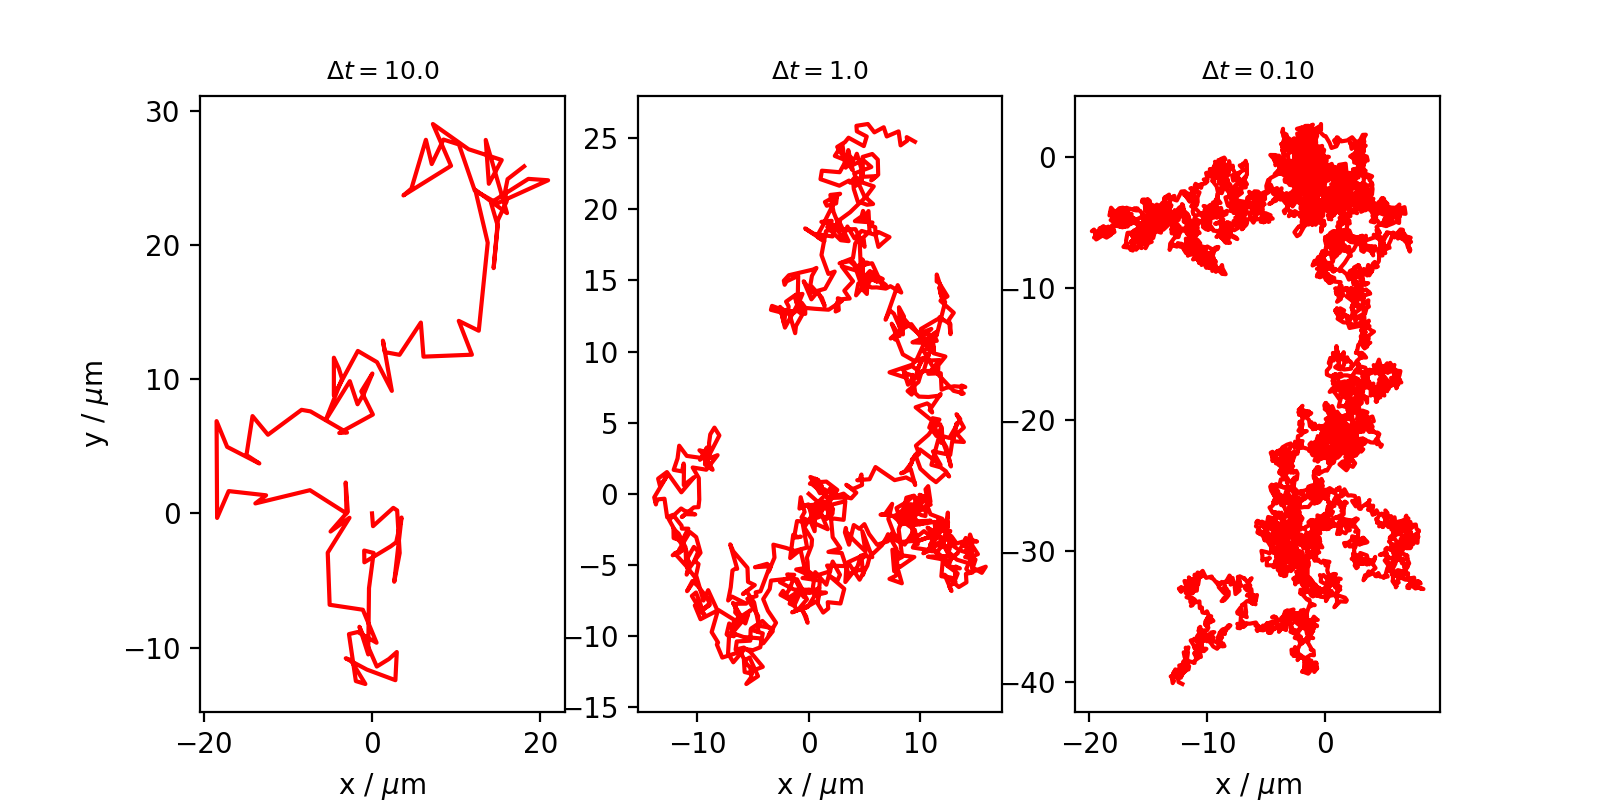

In [13]:
#create x and y brownian motion arrays for N in N_array
x_arrays = [np.asarray(brownian_motion2D(t_initial,t_final,dt)[0]) for dt in dt_array]
y_arrays = [np.asarray(brownian_motion2D(t_initial,t_final,dt)[1]) for dt in dt_array]

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(131)
ax1.plot(x_arrays[0],y_arrays[0], "r-")
ax1.set_title("$\Delta t=%0.1f$"%(dt_array[0]), fontsize=9)
ax1.set_xlabel("x / $\mu$m")
ax1.set_ylabel("y / $\mu$m")

ax2 = fig.add_subplot(132)
ax2.plot(x_arrays[1],y_arrays[1], "r-")
ax2.set_title("$\Delta t=%0.1f$"%(dt_array[1]), fontsize=9)
ax2.set_xlabel("x / $\mu$m")

ax3 = fig.add_subplot(133)
ax3.plot(x_arrays[2],y_arrays[2], "r-")
ax3.set_title("$\Delta t=%0.2f$"%(dt_array[2]), fontsize=9)
ax3.set_xlabel("x / $\mu$m");
#plt.savefig("Brownian2D.png")

In the three subplots shown above for Brownian Motion in 2D it is clear that a a larger number of discrete time steps for a constant total time of $T=1000s$ (or a smaller $\Delta t$) results in a more defined movement of the particle. Now that we have shown motion in two dimensions, we can proceed to calculate the MSD for this scenario. 

### Mean Square Displacement in 2D:

Since the particle has an extra dimension to move in, the MSD is calculated from $r$, the distance travelled by the particle in the xy-plane. $r$ can be calculated in a straightworward manner using the particles' initial and final positions on the x and y axes ($\left[ x(t),y(t) \right]$ and $\left[ x(t+\tau),y(t+\tau) \right]$, respectively, where $\tau$ is the time delay between observations) and Pythagoras' Theorem for each time step such that:

$$ r(t) = \sqrt{(x(t+\tau)-x(t))^{2}+(y(t+\tau)-y(t))^{2}} \tag{11} $$

The MSD is then simply:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = \langle r(t)^{2} \rangle \tag{12}$$

for each displacement $r(t)$. In the code cell below we define the function `MSD_2D` that calculates the mean square displacement for Brownian motion in two dimensions. Similarly to the calculation in 1D, the maximum stochastic error in two spatial dimensions follows the equation [3]:

$$ \Delta < 4Dn\Delta t \left[ \frac{2n^2+1}{3n(N-n+1)} \right]^{1/2} \tag{13}$$

with the only difference being an additional factor of $2$ due to the extra dimension in which the particle moves.

In [14]:
def MSD_2D(x_array,y_array,tau,dt):
    """Gives the 2D mean square displacement for a particle undergoing Brownian motion.
    Parameters:
    x_array (1D NumPy array): array of particle motion in x-direction.
    y_array (1D NumPy array): array of particle motion in y-direction.
    tau (float/int): time delay taken in calculation of MSD. tau <= (T_final-T_initial).
    dt (float): time step taken between particle movements.
    
    Output:
    MSD_exp (float): mean square displacement (meters).
    MSD_theo (float): theoretical mean square displacement (µm^2).
    error_MSD (float): error in the experimental MSD (µm^2).
    """
    #shift in data accounting for delay
    shift = int(np.floor(tau/dt))
    
    #create an array shifted by amount corresponding to delay for each dimension
    shifted_xarray = np.empty_like(x_array)
    shifted_xarray[-shift:] = np.nan
    shifted_xarray[:-shift] = x_array[shift:]
    
    shifted_yarray = np.empty_like(y_array)
    shifted_yarray[-shift:] = np.nan
    shifted_yarray[:-shift] = y_array[shift:]
    
    #difference squared
    diff_sq = np.square(x_array-shifted_xarray)+np.square(y_array-shifted_yarray)

    #mean square dispalcement, calculated and theoretical
    MSD = np.nanmean(diff_sq)
    
    #MSD error, with factor of 1e12 to have in units of µm^2
    error = 4*D*shift*dt*(np.sqrt((2*shift**2+1)/(3*shift*(len(x_array)-shift+1))))*1e12
    
    return MSD,error

<IPython.core.display.Javascript object>


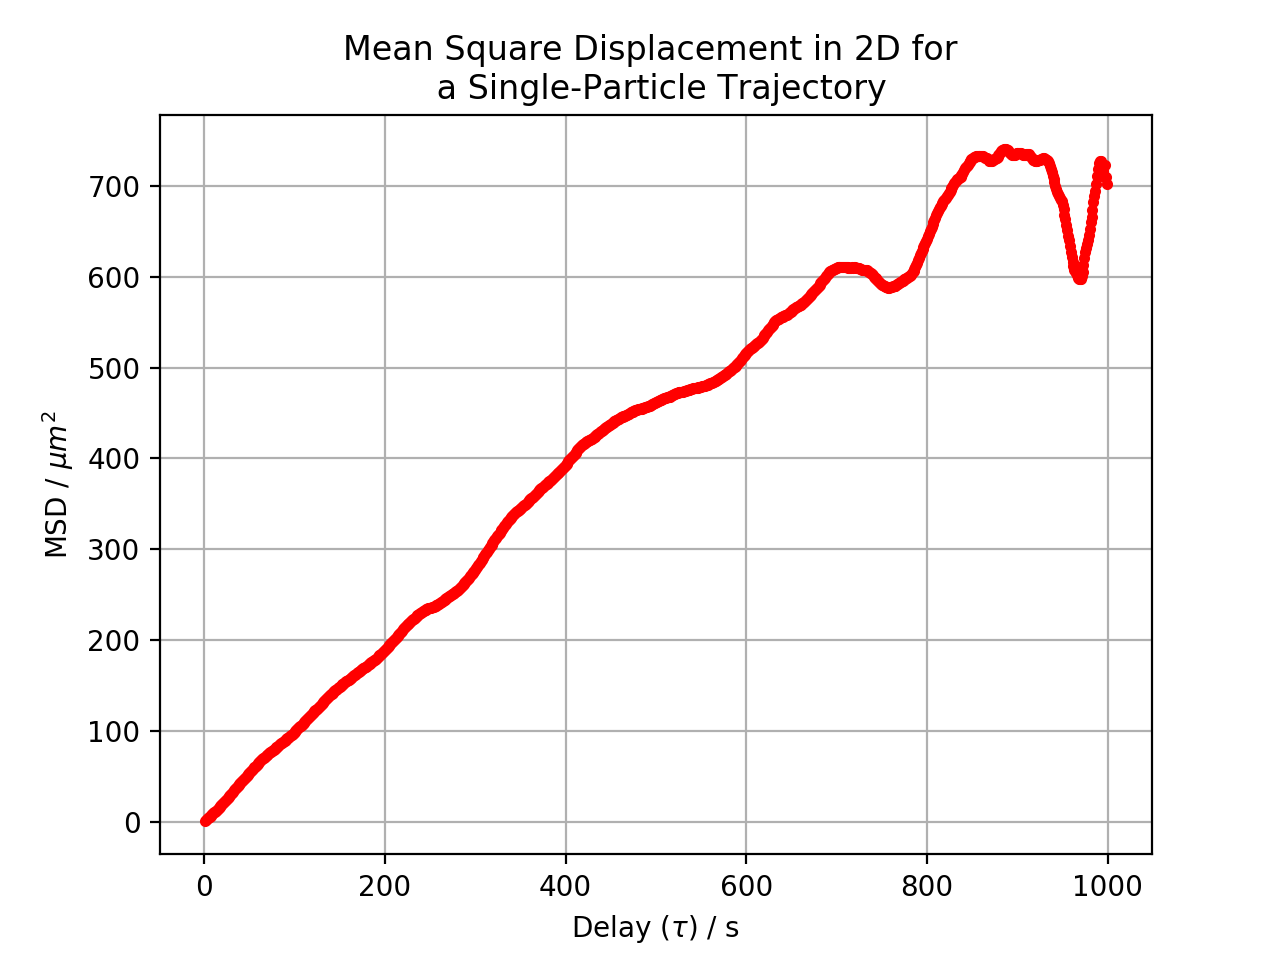

In [15]:
#MSD arrays for different values of T
MSD_exp_array2 = [MSD_2D(x_arrays[1],y_arrays[1],tau,dt)[0] for tau in tau_array]  
             
#make new figure and plot MSD against dt
plt.figure()
plt.grid()
plt.title("Mean Square Displacement in 2D for \n a Single-Particle Trajectory")
plt.plot(tau_array,MSD_exp_array2, "r.-")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$");
#plt.savefig("MSD_2D.png")

From the plot above, it is clear that the same problem of only calculating the MSD for one trajectory persists in not being able to show the linearity between MSD and $\tau$. In the cell below we perform the same procedure to calculate an average over 50 single-particle trajectories. 

<IPython.core.display.Javascript object>


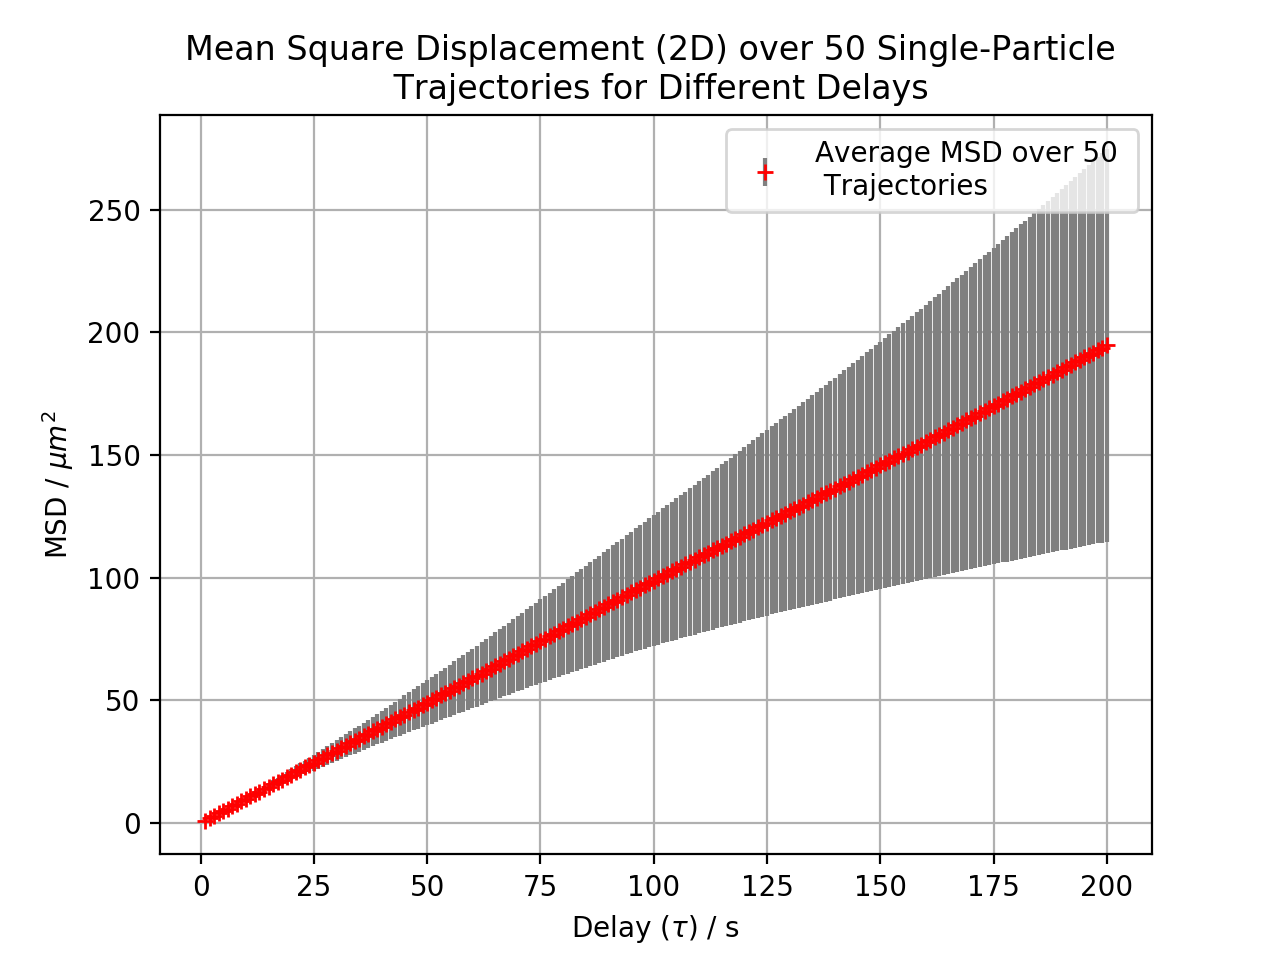

In [16]:
#use defined function to plot
tau_array2, MSD_average2, MSD_error2, ax2 = averaged_MSD(dt_array[1], trajectories, dim=2)
plt.show()

### Defining "Target" Function for Weighted Fit in 2D:

In [17]:
def MSD_theo2D(tau_array, D):
    """Theoretical Mean Square Displacement in two spatial dimensions.
    Parameters:
    tau_array (1D NumPy array): array of values for the delay.
    D (float): diffusion coefficient.
    
    Returns: 1D NumPy array of values for theoretical MSD in µm^2*s^(-1)."""
    
    return 4*D*tau_array

[0.24597591] [[5.38034324e-09]]


<IPython.core.display.Javascript object>


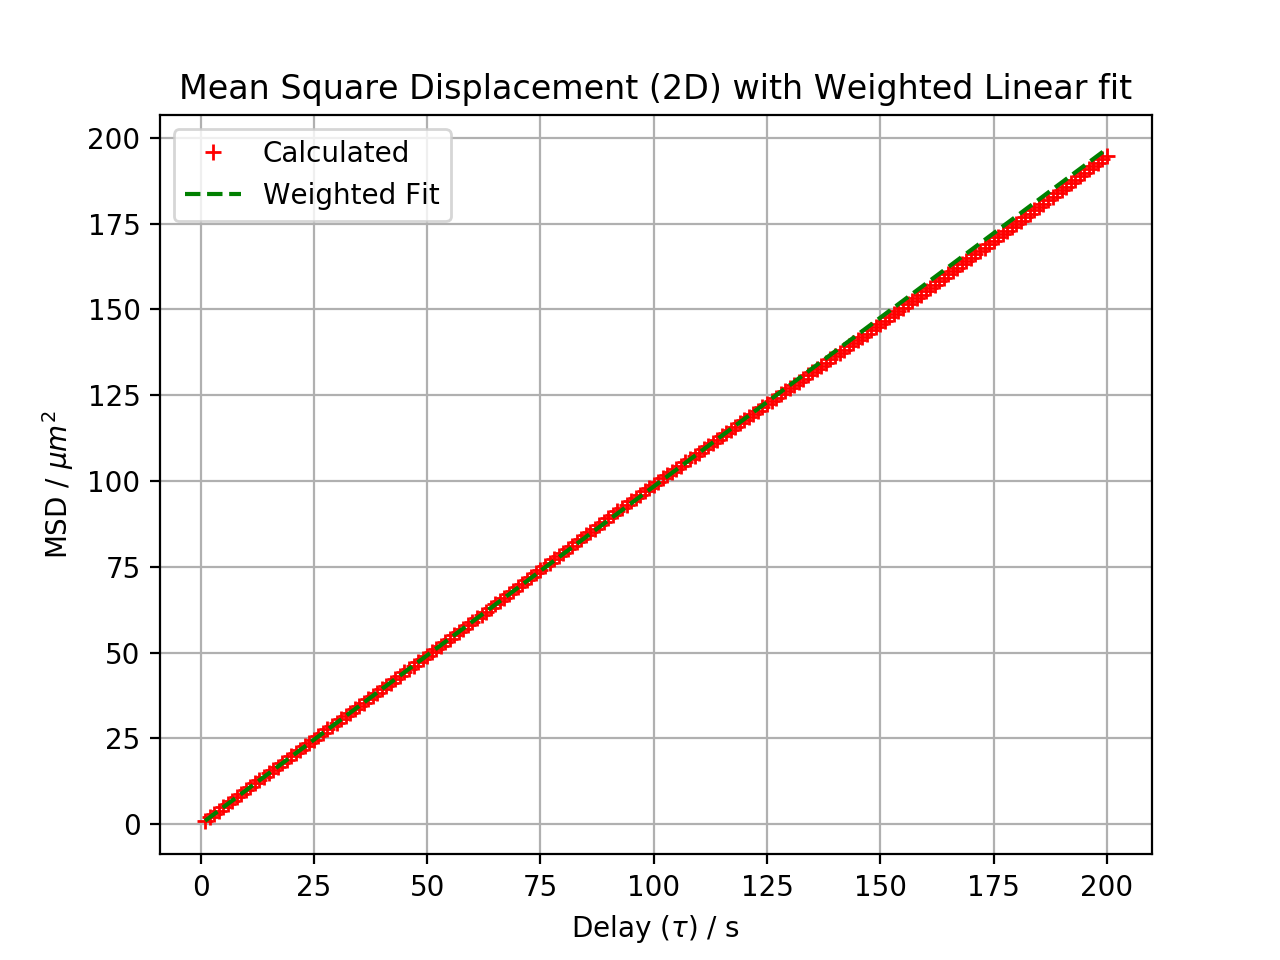

The theoretical Diffusion coefficient is:
 0.2452 µm^2*s^-1
The calculated diffusion coefficient is:
 0.2460  µm^2*s^-1
Perceived Percent error:
 0.3 %


In [18]:
#redefine arrays to fit in domain
tau_array2 = tau_array2[:domain]
MSD_average2 = MSD_average2[:domain]
MSD_error2 = MSD_error2[:domain]

#make weighted fit
popt2, pcov2 = curve_fit(MSD_theo2D, tau_array2, MSD_average2, sigma = MSD_error2, bounds = (0,0.3))
print(popt2,pcov2)

#make new figure and plot MSD against dt
plt.figure()
plt.grid()
plt.title(r"Mean Square Displacement (2D) with Weighted Linear fit")
plt.plot(tau_array2,MSD_average2,"r+", label="Calculated")
plt.plot(tau_array2,MSD_theo2D(tau_array2,popt2[0]),"g--", label="Weighted Fit")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$")
plt.legend(loc="upper left");
print("The theoretical Diffusion coefficient is:\n {:.4f}".format(D*1e12), "µm^2*s^-1")
print("The calculated diffusion coefficient is:\n {:.4f}".format(popt2[0])," µm^2*s^-1")
print("Perceived Percent error:\n {:.1f}".format((popt2[0]-D*1e12)*100/(D*1e12)), "%")

### Discussion:

In the case of a particle moving in two spatial dimensions, the diffusion coefficient is also calculated to be $D_{exp}=[0.2 \pm 0.1] \mu m^{2}s^{-1}$, which also includes the theoretical value within one $\sigma$. However, it also presents quite a large error of about $43\%$. 

Moreover, the plot of MSD against $\tau$ in 2D follows the same pattern as that in 1D. The only observable difference is in the slope of the linear portion of the data. With two spatial dimensions, the calculated slope is $0.947 \mu m^{2}s^{-1}$, whereas with one spatial dimension it was calculated to be $0.490 \mu m^{2}s^{-1}$. It is worth noting that these values vary each time the code is ran since it is calculated from random numbers, but they should always be around the values mentioned. It can be shown that the dependance of the MSD on the number of spatial dimensions, $n$, in in question is:

$$ \mathsf{M}\mathsf{S}\mathsf{D} = 2Dn\tau \tag{14}$$

Hence, our calculations are theoretically accurate since the slope of the plot in 2D is approximately twice as large as that in 1D.

## Conclusion

In this notebook, we have explored the Brownian effects on a microparticle in water. We have considered its motion in one and two spatial dimensions and calculated its mean square displacement as a function of the number of discrete time steps taken. However, we have only considered the particles equation of motion in the absence of inertial effects and a potential. In magnetophoretic control of HOPG microparticles, the particles are subject to a magnetic field gradient and thus to a magnetic potential. Hence, the next step in our exploration will be to investigate the effects of a potential in the particles motion. 

## Applying a Harmonic Potential to the Equation of Motion:

In many cases such as in optical tweezers it is useful to make the particle subject to a potential in order to confine it in a specific region in space. Adding such a term to the Langevin equation results in the following expression [1]:

$$ m\frac{d^{2}}{dt^{2}}r(t) = -\frac{d}{dr}U(r) -\gamma\frac{d}{dt}r(t) + \chi(t) \tag{15} $$

where $U(r)$ is the position-dependent potential. However, we can once again drop the inertial term for the same reasons explained previously, which leaves the equation:

$$ \frac{d}{dt}r(t) = -\frac{1}{\gamma}\frac{d}{dr}U(r) +\xi(t) \tag{16}$$

where $\xi(t)= \sqrt{2D}W(t)$ is a white noise term, with $D$ being the diffusion coefficient. 

Specifically, we are interested in seeing the effects a harmonic potential $U(r) = \frac{1}{2} \vec{k}\cdot\vec{r}^{2} $, where $\vec{k}=\left[ k_{x},k_{y},k_{z} \right]$ is the stiffness of the optical trap in three spatial dimensions and $\vec{r}=\left[ x,y,z \right]$ is the particles' position. Subsituting in this equation into Eq. 13 leaves the final simplified equation:

$$ \dot{r}(t) = -\frac{1}{\gamma}\vec{k}\cdot\vec{r}+\sqrt{2D}\vec{W}(t) \tag{17}$$

where $\vec{W}(t) = \left[ W_{x},W_{y},W_{z} \right] $ is  vector of white noise. In the terms of the finite difference equation for each dimension, we can calculate the particles motion iteratively as (Eq.7.24 in [1]):

$$ x_{i} = x_{i-1}-\frac{k_{x}}{\gamma}x_{i-1}\Delta t+ \sqrt{2D \Delta t} w_{x,i} \tag{18}$$

$$ y_{i} = y_{i-1}-\frac{k_{y}}{\gamma}y_{i-1}\Delta t+ \sqrt{2D \Delta t} w_{y,i} \tag{19}$$

$$ z_{i} = z_{i-1}-\frac{k_{z}}{\gamma}z_{i-1}\Delta t+ \sqrt{2D \Delta t} w_{z,i} \tag{20}$$

In the cells below we define first the stiffness constants in the three spatial dimensions and then a function that calculates the Brownian motion of a particle subject to a harmonic potential in three spatial dimensions.

### Stifness constants:

In [19]:
kx = 1e-8 #N/m
ky = 1e-8 #N/m
kz = 0.2e-8 #N/m

### Define function to calculate Brownian Motion of particle subject to Harmonic Potential:

In [20]:
def optical_trap(t_initial,t_final,dt, initial_condition=[0,0,0]):
    """Simulates motion of Brownian particle in an optical trap where the thermal noise
    drives the particle to move out of the trap but a harmonic restoring force drives it
    towards the center.
    
    Parameters:
    t_initial (float/int): time at which particle movement begins.
    t_final (float/int): time at which particle movement ends.
    dt (float/int): discrete time step.
    initial_condition (3D-array): values for initial condition (default=(0,0,0)).
    
    Output: 
    trap_xarray (1D NumPy array): array of x values for the trapped motion of a microparticle.
    trap_yarray (1D NumPy array): array of y values for the trapped motion of a microparticle.
    trap_zarray (1D NumPy array): array of z values for the trapped motion of a microparticle.
    """
    N = int((t_final-t_initial)/dt) #number of discrete time steps.
    
    #w_x, w_y, and w_z arrays of random normally distributed numbers with variance 1/dt (st.dev= 1/sqrt(dt))
    #multiplied by an additional factor to have in units of micrometers
    rand_norm_xarray = np.sqrt(2*D*dt)*np.random.normal(0,1,N)*1e06
    rand_norm_yarray = np.sqrt(2*D*dt)*np.random.normal(0,1,N)*1e06
    rand_norm_zarray = np.sqrt(2*D*dt)*np.random.normal(0,1,N)*1e06
    
    #initialise array for brownian motion with initial condition x(t=0)=0 and y(t=0)=0.
    trap_xarray = [initial_condition[0]] 
    trap_yarray = [initial_condition[1]]
    trap_zarray = [initial_condition[2]]
    
    #calculate motion in all directions for N-1 time steps
    for i in range(N-1):
        trap_xarray.append(trap_xarray[i]-(kx/gamma)*(trap_xarray[i]*dt)+rand_norm_xarray[i])
        trap_yarray.append(trap_yarray[i]-(ky/gamma)*(trap_yarray[i]*dt)+rand_norm_yarray[i])
        trap_zarray.append(trap_zarray[i]-(kz/gamma)*(trap_zarray[i]*dt)+rand_norm_zarray[i])
        
    return trap_xarray,trap_yarray,trap_zarray
    

<IPython.core.display.Javascript object>


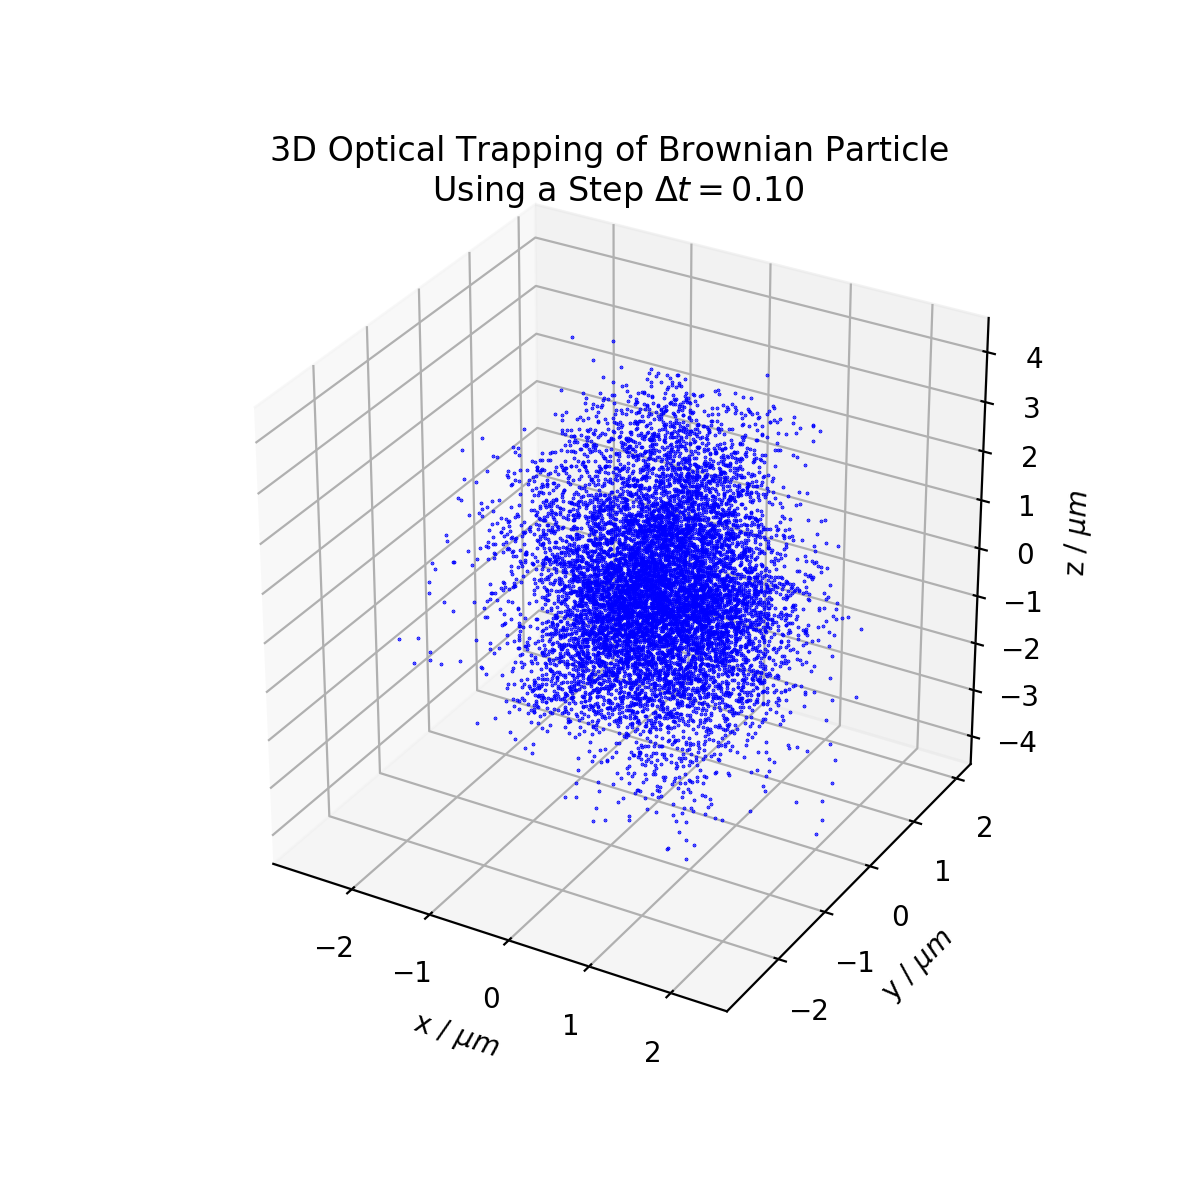

In [24]:
#calculate motion of particle, scale to have in µm
xtrap,ytrap,ztrap = optical_trap(t_initial,t_final,dt_array[2])

#make figure and plot it in 3d axes
plt.figure(figsize=(6,6))
ax = plt.axes(projection="3d")

ax.plot(xtrap,ytrap,ztrap,"b.", markersize=0.7)
ax.set_title("3D Optical Trapping of Brownian Particle \n Using a Step $\Delta t = %0.2f$ "%dt_array[2])
ax.set_xlabel("x / $\mu m$")
ax.set_ylabel("y / $\mu m$")
ax.set_zlabel("z / $\mu m$")
plt.show()
#plt.savefig("3D_Trapping.png");

The plot above shows the Brownian particle moves randomly but is confined to a 3D sphere/ellipse due to the presence of the harmonic potential. It is also interesting to calculate the mean square displacement in this situation. In the cell below we define a function to calculate the mean square displacement for an optically trapped particle. In terms of its error, it follows the same pattern as for one and two spatial dimensions such that the error for three spatial dimensions is:

$$ \Delta < 6Dn\Delta t \left[ \frac{2n^2+1}{3n(N-n+1)} \right]^{1/2} \tag{21}$$

In [25]:
def MSD_trap(x_array,y_array,z_array,tau,dt):
    """Gives the 3D mean square displacement for an optically trapped 
    Brownian particle.
    
    Parameters:
    x_array (1D NumPy array): array of particle motion in x-direction.
    y_array (1D NumPy array): array of particle motion in y-direction.
    z_array (1D NumPy array): array of particle motion in z-direction.
    tau (float/int): time delay taken in calculation of MSD. tau <= (T_final-T_initial).
    dt (float): time step taken between particle movements.
    
    Output:
    MSD_exp (float): experimental mean square displacement (µm^2).
    error_MSD (float): error in the experimental MSD (µm^2).
    """
    #shift in data accounting for delay
    shift = int(np.floor(tau/dt))
    
    #create an array shifted by amount corresponding to delay for each dimension
    shifted_xarray = np.empty_like(x_array)
    shifted_xarray[-shift:] = np.nan
    shifted_xarray[:-shift] = x_array[shift:]
    
    shifted_yarray = np.empty_like(y_array)
    shifted_yarray[-shift:] = np.nan
    shifted_yarray[:-shift] = y_array[shift:]
        
    shifted_zarray = np.empty_like(z_array)
    shifted_zarray[-shift:] = np.nan
    shifted_zarray[:-shift] = z_array[shift:]
    
    #difference squared
    diff_sq = np.square(x_array-shifted_xarray)+np.square(y_array-shifted_yarray)+np.square(z_array-shifted_zarray)

    #mean square dispalcement
    MSD = np.nanmean(diff_sq)
    
    return MSD

<IPython.core.display.Javascript object>


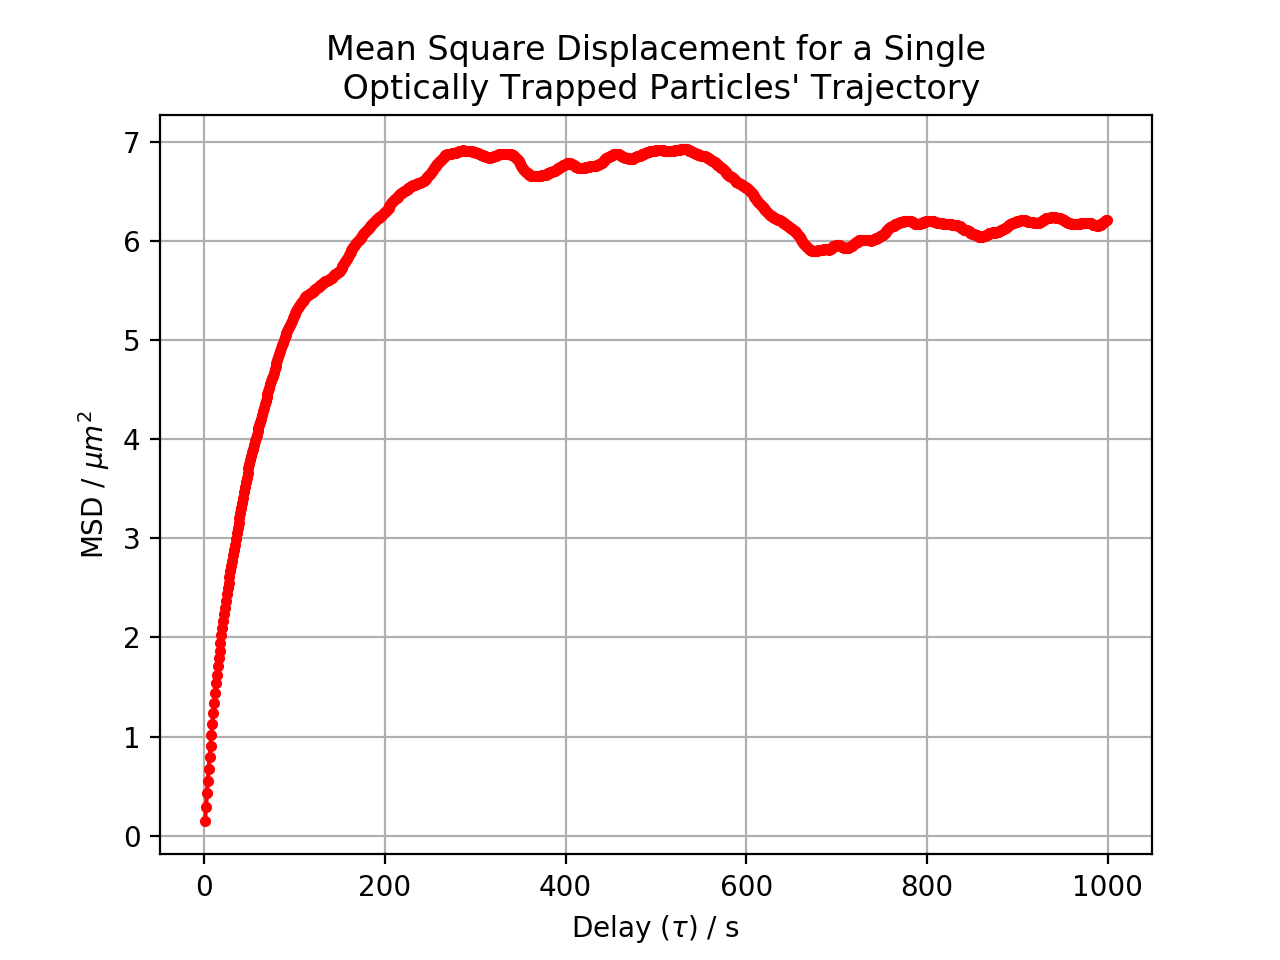

In [26]:
#MSD arrays for different values of tau
MSD_exp_array3 = [MSD_trap(xtrap,ytrap,ztrap,tau,dt) for tau in tau_array]  
            
#make new figure and plot MSD against dt
plt.figure()
plt.grid()
plt.title("Mean Square Displacement for a Single\n Optically Trapped Particles' Trajectory")
plt.plot(tau_array,MSD_exp_array3, "r.-")
plt.xlabel(r"Delay ($\tau$) / s")
plt.ylabel("MSD / $\mu m^{2}$");
#plt.savefig("MSD_2D.png")

As could have been expected, the MSD curve shows how the MSD increases at first and then plateau's for large delays, since the particle can only move within a specific volume. Below we calculate the average MSD over 50 different particle trajectories to obtain a more precise plot of MSD against $\tau$.

<IPython.core.display.Javascript object>


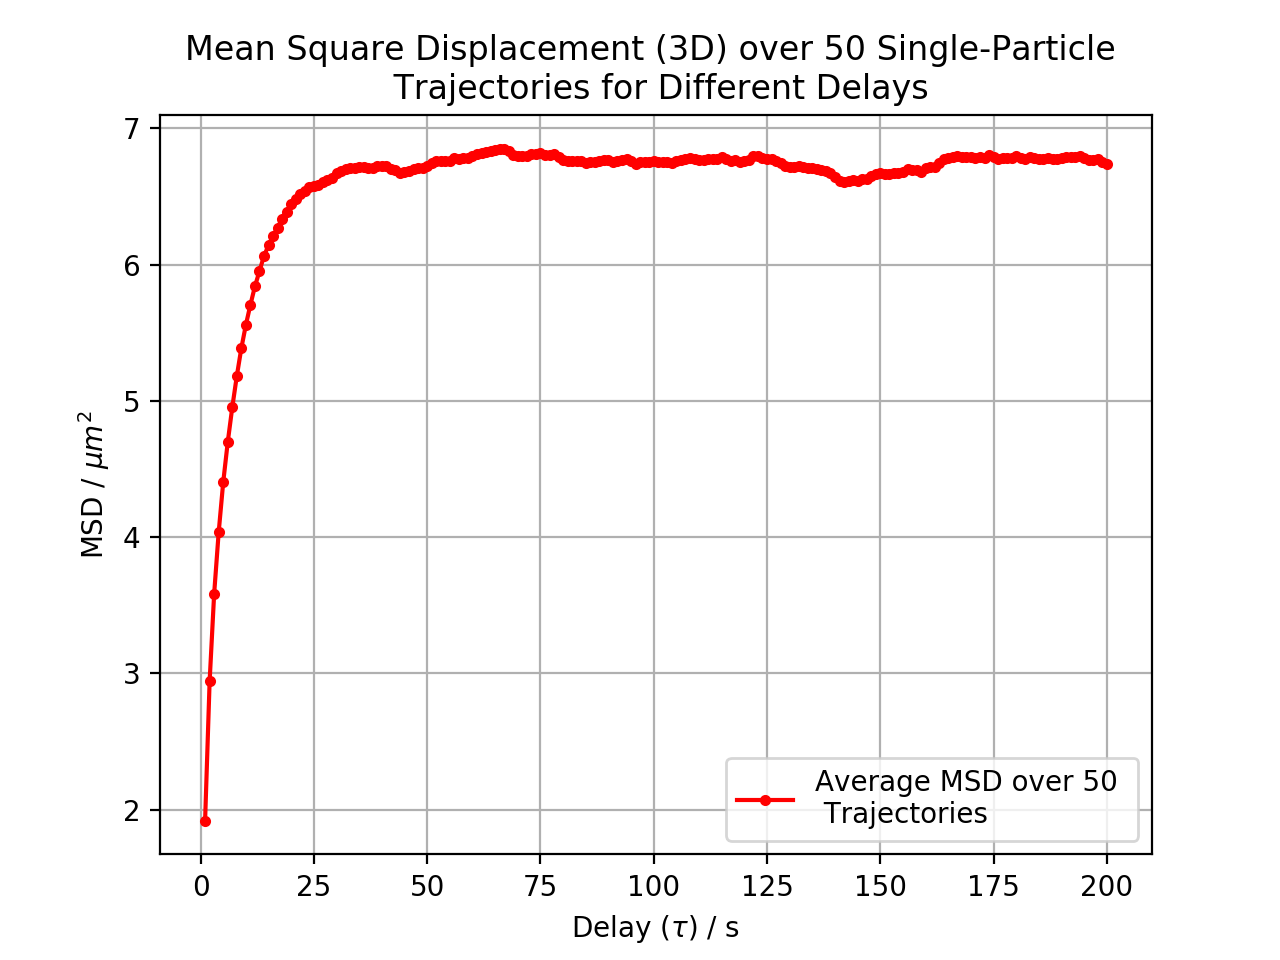

In [27]:
#use defined function to plot
tau_array3, MSD_average3, MSD_error3, ax3 = averaged_MSD(dt_array[1], trajectories, dim=3)
plt.show()

By averaging 50 trajectories, the curve becomes more defined and it is clear that the MSD plateaus after a certain delay due to the trapping of the particle.

## Solving For Particle Motion with a System of Coupled ODE's

As of now, we have only solved for the motion of a Brownian particle trapped under a harmonic potential where the movement of the particle in one axis is independent from its movement on another axis. It is, however, also interesting to explore scenarios with more complex potentials. For instance, the case may exist where the particle is optically trapped for a period of time but a sudden increase in temperature results in larger Brownian fluctuations that allow the particle to escape the optical trap and enter another. This would be the case if a so-called "Egg-carton" potential were applied to the particle. Such a potential has the form [4]:

$$ \mathsf{V}(x,y) = -\mathsf{a}_{0} \left[cos(x)+cos(y) \right] + \mathsf{a}_{1}cos(x)cos(y) \tag{22} $$

We can now insert this potential into a Lagrangian and solve the Euler-Lagrange equation including the non-conservative force terms (damping and brownian terms) to get our equations of motion in both spatial dimensions:

$$ m\frac{d^{2}}{dt^{2}}x(t) = -\frac{\delta}{\delta x}V(x,y) -\gamma\frac{d}{dt}x(t) + \sqrt{2D}W(t) \tag{23} $$

$$ m\frac{d^{2}}{dt^{2}}y(t) = -\frac{\delta}{\delta y}V(x,y) -\gamma\frac{d}{dt}y(t) + \sqrt{2D}W(t) \tag{24} $$

However, we can once more ignore the inertial terms in both of the above and express the resulting equations in terms of their finite difference equations:

$$ x_i - x_{i-1} = \frac{-\Delta t}{\gamma} \left[ a_0\sin{x_{i-1}} - a_1\sin{x_{i-1}}\cos{y_{i-1}} \right] $$

$$ + \sqrt{2D\Delta t} w_{x,i} \tag{25} $$

$$ y_i - y_{i-1} = \frac{-\Delta t}{\gamma} \left[ a_0\sin{y_{i-1}} - a_1\sin{y_{i-1}}\cos{x_{i-1}} \right] $$

$$ + \sqrt{2D\Delta t} w_{y,i} \tag{26} $$

where we have assumed that $\gamma_x=\gamma_y=\gamma$. We can therefore now define a function in the cell below that solves for the particles motion under these conditions. In terms of the constants $\mathsf{a}_{0}$ and $\mathsf{a}_{1}$, I have assigned the values $\mathsf{a}_{0}=4.5*10^{-8}$ and $\mathsf{a}_{1}=1*10^{-8}$ through trial and error so that the effect of the potential is clear on the plot for the parameters and constants previously defined in the notebook.

In [28]:
#defining constants used in egg-carton potential
a0 = 4.5e-08
a1 = 1e-08

In [29]:
def eggcarton_trap(t_initial, t_final, dt, a0, a1, initial_condition=[0,0]):
    """Simulates the motion of a Brownian particle under an "egg-carton" potential.
    
    Parameters:
    t_initial (float/int): time at which particle movement begins.
    t_final (float/int): time at which particle movement ends.
    dt (float/int): discrete time step.
    a0, a1 (float/int): constants in egg-carton potential.
    initial_condition (2D-array): values for initial condition (default=(0,0)).
    
    Output: 
    x_array (1D NumPy array): array of particle positions in x-axis.
    y_array (1D NumPy array): array of particle positions in y-axis."""
    
    N = int((t_final-t_initial)/dt) #number of discrete time steps
    
    #w_x, w_y, and w_z arrays of random normally distributed numbers with variance 1/dt (st.dev= 1/sqrt(dt))
    #multiplied by an additional factor to have in units of micrometers
    rand_norm_xarray = np.sqrt(2*D*dt)*np.random.normal(0,1,N)*1e06
    rand_norm_yarray = np.sqrt(2*D*dt)*np.random.normal(0,1,N)*1e06
    
    #insert initial position of particle
    x_array = [initial_condition[0]]
    y_array = [initial_condition[1]]
    
    #calculate motion in all directions for N-1 time steps
    for i in range(N-1):
        x_array.append(x_array[i]-(dt/gamma)*(a0*np.sin(x_array[i])-a1*np.sin(x_array[i])*np.cos(y_array[i]))+rand_norm_xarray[i])
        y_array.append(y_array[i]-(dt/gamma)*(a0*np.sin(y_array[i])-a1*np.sin(y_array[i])*np.cos(x_array[i]))+rand_norm_yarray[i])

    return x_array,y_array

<IPython.core.display.Javascript object>


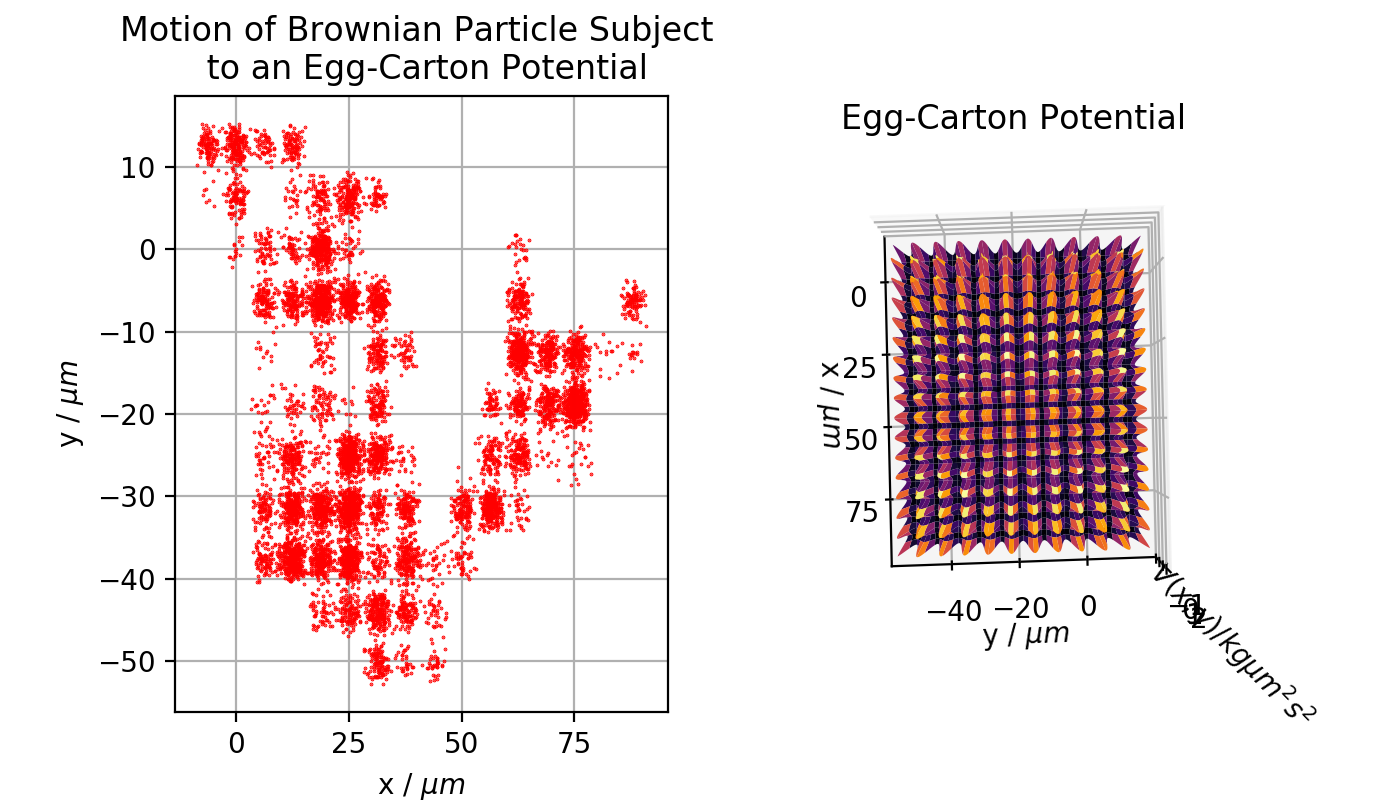

In [32]:
#redefine time-frame of particle motion
t_initial = 0 #seconds
t_final = 10000 #seconds
dt = 1 #time step in seconds

#get arrays of values ofr particle motion
x_array, y_array = eggcarton_trap(t_initial, t_final, dt, a0, a1)

#make a mesh and calculate potential for each x and y value
x = np.linspace(min(x_array), max(x_array), 500)
y = np.linspace(min(y_array), max(y_array), 500)
x_mesh,y_mesh = np.meshgrid(x,y)
V = -(np.cos(x_mesh)+np.cos(y_mesh))+np.cos(x_mesh)*np.cos(y_mesh) 

#plot potential and particle motion
fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(121)
ax1.grid()
ax1.plot(x_array, y_array, "r.", markersize=0.7)
ax1.set_title("Motion of Brownian Particle Subject \n to an Egg-Carton Potential")
ax1.set_xlabel("x / $\mu m$")
ax1.set_ylabel("y / $\mu m$")

ax2 = fig.add_subplot(122, projection="3d")
ax2.plot_surface(x_mesh,y_mesh,V,cmap="inferno")
ax2.set_title("Egg-Carton Potential")
ax2.set_xlabel("x / $\mu m$")
ax2.set_ylabel("y / $\mu m$")
ax2.set_zlabel(r"$V(x,y) / kgµm^2s^2$");

### Discussion:

From the plot above, it is clear how the particle is trapped for a given amount of time in a certain "well" within the defined potential, but due to the thermal fluctuations it is able to escape spontaneously from this well and move on to another one within the potential. 

### Varying the Temperature:

It is also interesting to explore the effects of changing the temperature of the environment on the motion of the particle within this potential. 

<IPython.core.display.Javascript object>


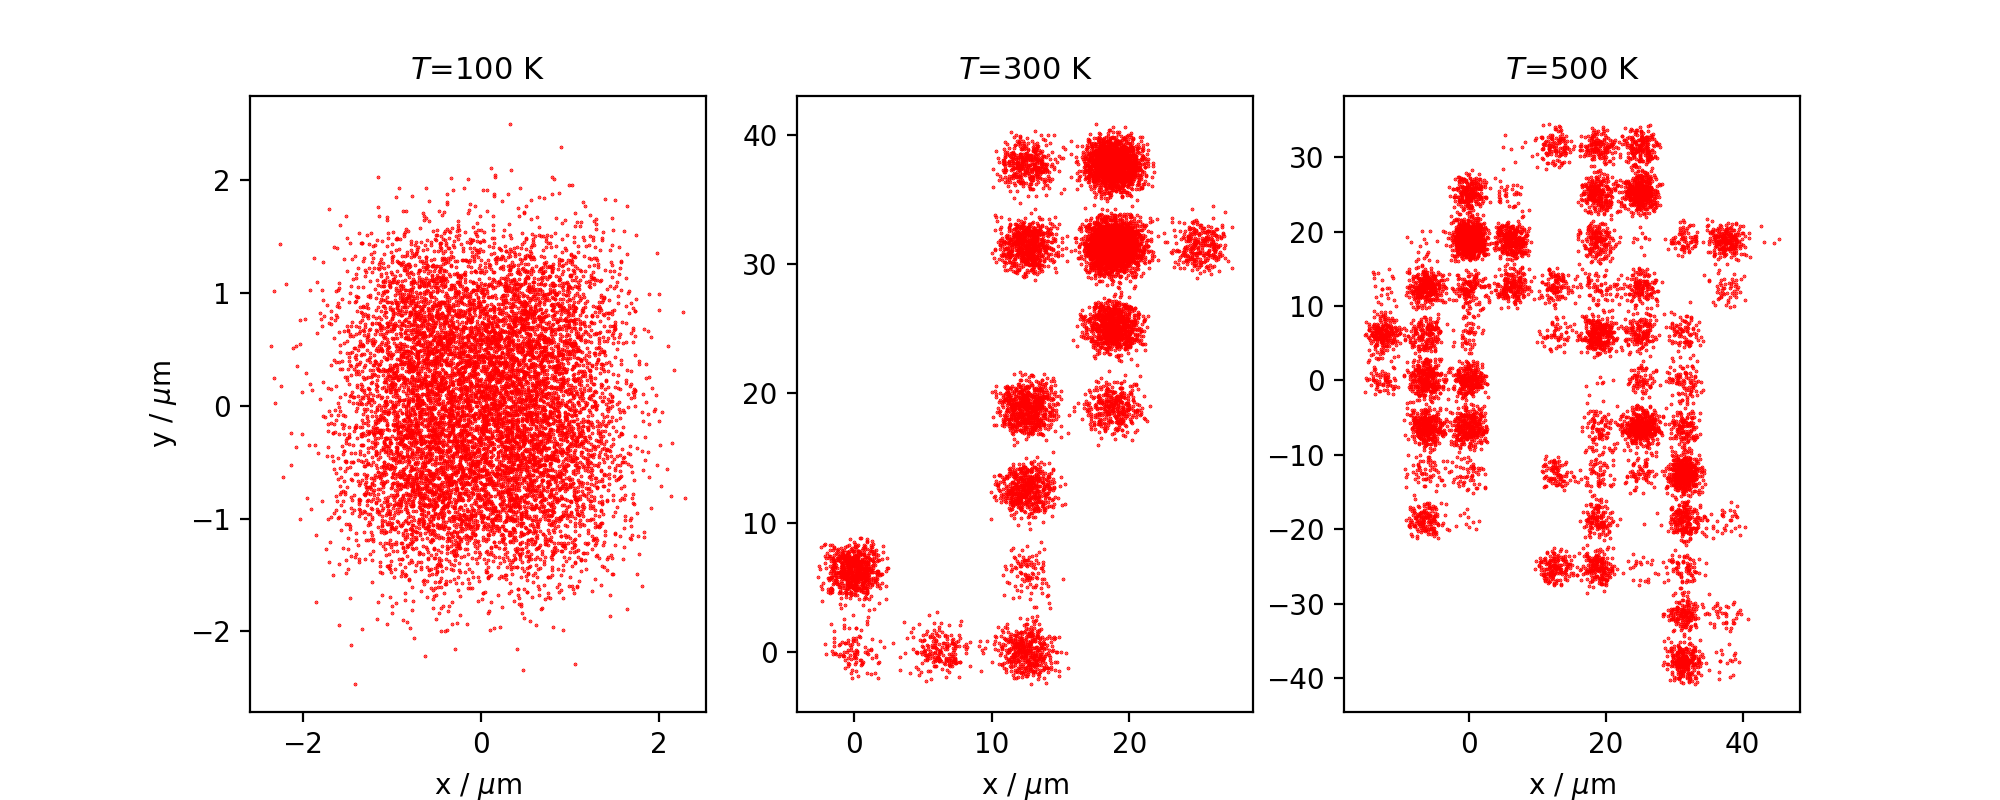

In [33]:
Temp_array = [100,300,500] #array of temperatures in degrees Kelvin
D_array = [(kb*T)/gamma for T in Temp_array] #array of diffusion coefficients for different temperatures

#initialise motion arrays
x_arrays = []
y_arrays = []

#loop to calculate motion for different values of the Diffusion coefficient
for D in D_array:
    x_arrays.append(eggcarton_trap(t_initial, t_final, dt, a0, a1)[0])
    y_arrays.append(eggcarton_trap(t_initial, t_final, dt, a0, a1)[1])

#plot arrays in subplots
fig = plt.figure(figsize=(10,4))

#Motion for T=100K
ax1 = fig.add_subplot(131) 
ax1.plot(x_arrays[0],y_arrays[0], "r.", markersize=0.7)
ax1.set_title("$T$=%i K"%(Temp_array[0]), fontsize=11)
ax1.set_xlabel("x / $\mu$m")
ax1.set_ylabel("y / $\mu$m")

#Motion for T=300K
ax2 = fig.add_subplot(132) 
ax2.plot(x_arrays[1],y_arrays[1], "r.", markersize=0.7)
ax2.set_title("$T$=%i K"%(Temp_array[1]), fontsize=11)
ax2.set_xlabel("x / $\mu$m")

#Motion for T=500K
ax3 = fig.add_subplot(133) 
ax3.plot(x_arrays[2],y_arrays[2], "r.", markersize=0.7)
ax3.set_title("$T$=%i K"%(Temp_array[2]), fontsize=11)
ax3.set_xlabel("x / $\mu$m");


### Discussion

As could have been expected, the particle tends to jump more from well to well in the potential as the temperature increases. the reason for this is that the magnitude of the thermal fluctuations increases and allows for the particle to make a big enough jump more often. 

### Simulating Gravity In Our Particle's Motion:

In reality, as the Brownian particle is travelling through the liquid as a result of the magnetic field gradient, it will be subject to an additional force in the negative z-direction due to gravity. A simple but effective way of simulating this force in the negative z-direction would be to rotate our potential around the z-axis by an angle $0 < \theta < \frac{\pi}{2}$. We can achieve this by applying the 

## Bibliography

[1]. Jones, P., Maragò, O. and Volpe, G., 2015. Optical Tweezers (pp. 188-218). Cambridge: Cambridge University Press.

[2]. G. Volpe and G. Volpe, “Simulation of a Brownian particle in an optical trap,” American Journal of Physics, vol. 81, no. 3, pp. 224–230, 2013.

[3]. H. Qian, M. Sheetz, and E. Elson, “Single particle tracking. Analysis of diffusion and flow in two-dimensional systems”, Biophysical Journal, vol. 60, no. 4. pp. 910-921, 1991, doi: 10.1016/s0006-3495(91)82125-7.

[4]. G. Caratti, R. Ferrando, R. Spadacini, and G. E. Tommei, “Underdamped diffusion in the egg-carton potential,” Phys. Rev. E Stat. Phys. Plasmas Fluids Relat. Interdiscip. Topics, vol. 55, no. 4, pp. 4810–4811, 1997.
